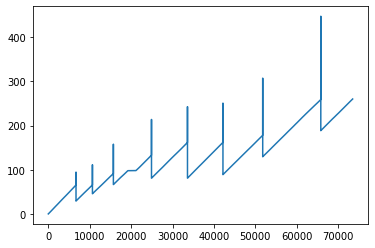

In [1]:
import pandas
import matplotlib.pyplot as plt
usecol = ["Disk_Usage_MB", "Redis_Date_Time"]
dataset = pandas.read_csv('redis_results_uncompressed.csv', usecols=usecol, engine='python')
dataset = dataset.set_index("Redis_Date_Time")
#dataset.head(7)
plt.plot(dataset)
plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [6]:
dataframe = pandas.read_csv('redis_results_uncompressed.csv')
dataframe

,Date_time,CPU,Memory_Bytes,Disk_Usage,Redis_Date_Time,Disk_Usage_MB
0,1629986341,3.000686e+10,8933376,4,0,0.004
1,1629986342,3.003107e+10,9121792,8,1,0.008
2,1629986343,3.006815e+10,9183232,16,2,0.016
3,1629986344,3.011995e+10,9293824,28,3,0.028
4,1629986345,3.017539e+10,9228288,36,4,0.036
...,...,...,...,...,...,...
62589,1630059844,2.750000e+12,1126617088,260008,73503,260.008
62590,1630059845,2.750000e+12,1126600704,260016,73504,260.016
62591,1630059847,2.750000e+12,1126432768,260028,73506,260.028
62592,1630059848,2.750000e+12,1126526976,260040,73507,260.040


In [7]:
data = dataframe.filter(['Disk_Usage_MB'])
# convert the data frame to numpy array
dataset = data.values

training_data_len = math.ceil(len(dataset) * .7)
training_data_len

43816

In [8]:
# scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00000000e+00],
       [8.94262412e-06],
       [2.68278724e-05],
       ...,
       [5.81324224e-01],
       [5.81351052e-01],
       [5.81368937e-01]])

In [9]:
# create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
# split the data into x_train and y_train
x_train= []
y_train=[]

for i in range (30, len(train_data)):
    x_train.append(train_data[i-30:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 31:
        print(x_train)
        print(y_train)

[array([0.00000000e+00, 8.94262412e-06, 2.68278724e-05, 5.36557447e-05,
       7.15409930e-05, 9.83688654e-05, 1.16254114e-04, 1.43081986e-04,
       1.69909858e-04, 1.87795107e-04, 2.14622979e-04, 2.41450851e-04,
       2.59336100e-04, 2.86163972e-04, 3.12991844e-04, 3.30877093e-04,
       3.57704965e-04, 3.84532837e-04, 4.11360710e-04, 4.29245958e-04,
       4.56073830e-04, 4.82901703e-04, 5.00786951e-04, 5.27614823e-04,
       5.54442696e-04, 5.81270568e-04, 5.99155816e-04, 6.25983689e-04,
       6.52811561e-04, 6.70696809e-04])]
[0.0006975246816425812]
[array([0.00000000e+00, 8.94262412e-06, 2.68278724e-05, 5.36557447e-05,
       7.15409930e-05, 9.83688654e-05, 1.16254114e-04, 1.43081986e-04,
       1.69909858e-04, 1.87795107e-04, 2.14622979e-04, 2.41450851e-04,
       2.59336100e-04, 2.86163972e-04, 3.12991844e-04, 3.30877093e-04,
       3.57704965e-04, 3.84532837e-04, 4.11360710e-04, 4.29245958e-04,
       4.56073830e-04, 4.82901703e-04, 5.00786951e-04, 5.27614823e-04,
       5.5

In [10]:
# convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
# reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(43786, 30, 1)

In [12]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [13]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
model.fit(x_train, y_train, batch_size=1, epochs=25)

Epoch 1/25
43786/43786 [==============================] - 499s 11ms/step - loss: 6.1246e-05
Epoch 2/25
43786/43786 [==============================] - 659s 15ms/step - loss: 2.6065e-05
Epoch 3/25
43786/43786 [==============================] - 651s 15ms/step - loss: 2.3383e-05
Epoch 4/25
43786/43786 [==============================] - 661s 15ms/step - loss: 2.0375e-05
Epoch 5/25
43786/43786 [==============================] - 634s 14ms/step - loss: 1.9072e-05
Epoch 6/25
43786/43786 [==============================] - 650s 15ms/step - loss: 1.7953e-05
Epoch 7/25
43786/43786 [==============================] - 653s 15ms/step - loss: 1.9471e-05
Epoch 8/25
43786/43786 [==============================] - 711s 16ms/step - loss: 1.4689e-05
Epoch 9/25
43786/43786 [==============================] - 675s 15ms/step - loss: 1.5438e-05
Epoch 10/25
43786/43786 [==============================] - 738s 17ms/step - loss: 1.0561e-05
Epoch 11/25
43786/43786 [==============================] - 693s 16ms/step - los

In [15]:
# create the testing dataset
# array from 10500 to 15042
test_data = scaled_data[training_data_len - 30: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(30, len(test_data)):
    x_test.append(test_data[i-30:i, 0])

In [16]:
# convert data to numpy array
x_test = np.array(x_test)

In [17]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [18]:
# get the models predicted values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [19]:
# get the root mean squared error
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.3178057589663498

C:\Users\anush\AppData\Local\Temp/ipykernel_4160/1694030374.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


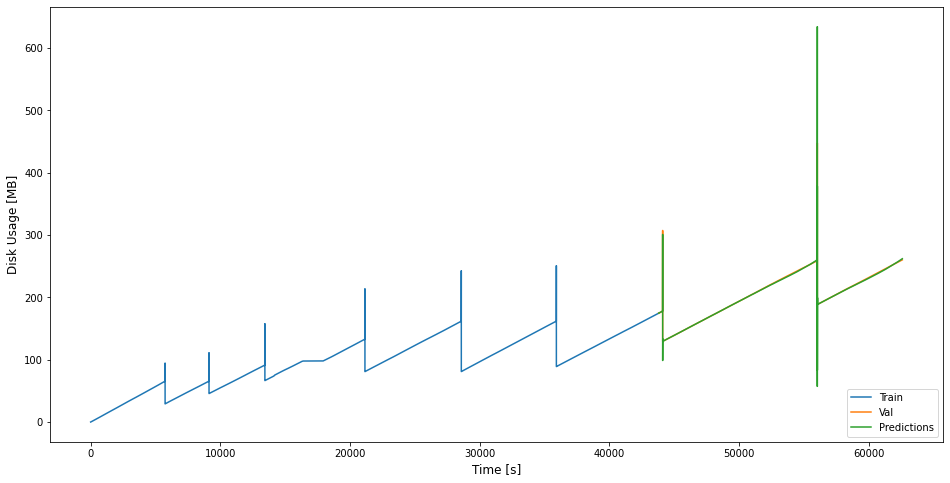

In [30]:
# plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# visualize
plt.figure(figsize=(16,8))
plt.xlabel('Time [s]', fontsize=12)
plt.ylabel('Disk Usage [MB]', fontsize=12)
plt.plot(train['Disk_Usage_MB'])
plt.plot(valid[['Disk_Usage_MB', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
#plt.ylim(0,100)
plt.show()

In [31]:
valid
import csv

with open(r'redis_lstm_disk_space.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(['timeslot', 'rl_storage_allocation', 'downtime'])

In [32]:
# Get the data
new_df = dataframe.filter(['Disk_Usage_MB'])
new_dataset = new_df.values
length_new_dataset = len(new_dataset)
downtime = 0
previous_value = 0
print(length_new_dataset)
for i in range(30, length_new_dataset):
    last_30_days = new_df[i-30:i].values
    last_30_days_scaled = scaler.transform(last_30_days)
    # create an empty list
    X_test = []
    X_test.append(last_30_days_scaled)
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    # get the predicted scaled value
    pred_disk_usage = model.predict(X_test)
    # undo scaling
    pred_disk_usage = scaler.inverse_transform(pred_disk_usage)
    difference = pred_disk_usage.item() - previous_value
    
    if difference == 0:
        pass
    elif difference > 0:
        downtime += 1
    else:
        if difference < -65:
            downtime += 40
        else:
            pass
    with open(r'redis_lstm_disk_space.csv', 'a') as f:
        writer = csv.writer(f)
        writer.writerow([i, pred_disk_usage, downtime])
    print(pred_disk_usage)
    
    previous_value = pred_disk_usage.item()
    
#last_30_days

62594
[[0.48372328]]
[[0.49646053]]
[[0.50655836]]
[[0.51506317]]
[[0.5278204]]
[[0.5378783]]
[[0.54638976]]
[[0.5591137]]
[[0.56917155]]
[[0.580789]]
[[0.5893205]]
[[0.6020111]]
[[0.6122022]]
[[0.6238131]]
[[0.6354239]]
[[0.6439754]]
[[0.6567993]]
[[0.66699046]]
[[0.67858124]]
[[0.68714607]]
[[0.6999033]]
[[0.71004784]]
[[0.7185993]]
[[0.73136324]]
[[0.73834836]]
[[0.7511056]]
[[0.76117015]]
[[0.76959497]]
[[0.78232557]]
[[0.7923567]]
[[0.8039609]]
[[0.81245244]]
[[0.8251963]]
[[0.8353608]]
[[0.8438856]]
[[0.8566762]]
[[0.8667474]]
[[0.8783648]]
[[0.8868763]]
[[0.8996269]]
[[0.90981805]]
[[0.9214089]]
[[0.9330264]]
[[0.94153786]]
[[0.95442176]]
[[0.9646129]]
[[0.97624373]]
[[0.9878612]]
[[0.9963794]]
[[1.0092432]]
[[1.0194345]]
[[1.0310986]]
[[1.0395967]]
[[1.0523807]]
[[1.0625451]]
[[1.074196]]
[[1.0827208]]
[[1.095498]]
[[1.1056358]]
[[1.1172934]]
[[1.1289041]]
[[1.137429]]
[[1.1503062]]
[[1.1604906]]
[[1.1721015]]
[[1.1837656]]
[[1.1922638]]
[[1.205161]]
[[1.2153522]]
[[1.2238836]]

[[7.1045895]]
[[7.116387]]
[[7.1282506]]
[[7.1400747]]
[[7.151912]]
[[7.1637497]]
[[7.175627]]
[[7.1841054]]
[[7.197329]]
[[7.207547]]
[[7.2193513]]
[[7.2310886]]
[[7.242806]]
[[7.25463]]
[[7.2631216]]
[[7.2763124]]
[[7.2865434]]
[[7.298314]]
[[7.310058]]
[[7.3184366]]
[[7.3316]]
[[7.341851]]
[[7.353609]]
[[7.3653464]]
[[7.377097]]
[[7.388881]]
[[7.4007254]]
[[7.409217]]
[[7.422447]]
[[7.4326653]]
[[7.444463]]
[[7.4528275]]
[[7.465958]]
[[7.4761357]]
[[7.48792]]
[[7.4996576]]
[[7.508029]]
[[7.5212326]]
[[7.531424]]
[[7.543195]]
[[7.551586]]
[[7.5646834]]
[[7.574881]]
[[7.586672]]
[[7.5983896]]
[[7.6101336]]
[[7.621951]]
[[7.6338086]]
[[7.6422734]]
[[7.655497]]
[[7.6657615]]
[[7.677532]]
[[7.6892567]]
[[7.7010274]]
[[7.7094655]]
[[7.7227025]]
[[7.7329206]]
[[7.744698]]
[[7.756462]]
[[7.768213]]
[[7.7800303]]
[[7.788515]]
[[7.801732]]
[[7.81195]]
[[7.8237543]]
[[7.835465]]
[[7.8472557]]
[[7.8556805]]
[[7.868898]]
[[7.879102]]
[[7.890913]]
[[7.899291]]
[[7.9124017]]
[[7.9226127]]
[[7.9344

[[14.006255]]
[[14.01814]]
[[14.026471]]
[[14.039962]]
[[14.0501995]]
[[14.062063]]
[[14.073908]]
[[14.085718]]
[[14.097616]]
[[14.109553]]
[[14.12147]]
[[14.129783]]
[[14.143292]]
[[14.153517]]
[[14.165435]]
[[14.177252]]
[[14.189063]]
[[14.197348]]
[[14.210858]]
[[14.221056]]
[[14.232986]]
[[14.244784]]
[[14.256628]]
[[14.268533]]
[[14.280443]]
[[14.288728]]
[[14.302252]]
[[14.31251]]
[[14.32438]]
[[14.336191]]
[[14.348042]]
[[14.356307]]
[[14.36981]]
[[14.380055]]
[[14.391946]]
[[14.403776]]
[[14.415594]]
[[14.427491]]
[[14.435817]]
[[14.4493065]]
[[14.459564]]
[[14.471442]]
[[14.483259]]
[[14.491471]]
[[14.504961]]
[[14.515193]]
[[14.527083]]
[[14.538914]]
[[14.550758]]
[[14.562629]]
[[14.570941]]
[[14.584464]]
[[14.594695]]
[[14.60662]]
[[14.618417]]
[[14.630268]]
[[14.638526]]
[[14.65205]]
[[14.662281]]
[[14.674185]]
[[14.686016]]
[[14.69784]]
[[14.70975]]
[[14.721648]]
[[14.7299595]]
[[14.743484]]
[[14.753735]]
[[14.765645]]
[[14.77745]]
[[14.789313]]
[[14.801185]]
[[14.813135]]

[[20.762245]]
[[20.772484]]
[[20.784449]]
[[20.796318]]
[[20.804344]]
[[20.818113]]
[[20.828352]]
[[20.840288]]
[[20.852173]]
[[20.86407]]
[[20.876015]]
[[20.884132]]
[[20.897903]]
[[20.908127]]
[[20.920113]]
[[20.93199]]
[[20.94388]]
[[20.955832]]
[[20.967808]]
[[20.979765]]
[[20.987877]]
[[21.001675]]
[[21.011885]]
[[21.023863]]
[[21.035727]]
[[21.043772]]
[[21.057556]]
[[21.067753]]
[[21.079718]]
[[21.087736]]
[[21.101439]]
[[21.111624]]
[[21.123615]]
[[21.135498]]
[[21.147364]]
[[21.159307]]
[[21.17131]]
[[21.183275]]
[[21.19526]]
[[21.203358]]
[[21.217161]]
[[21.227386]]
[[21.23935]]
[[21.25122]]
[[21.263132]]
[[21.27121]]
[[21.285006]]
[[21.29523]]
[[21.307196]]
[[21.319073]]
[[21.33095]]
[[21.342907]]
[[21.354904]]
[[21.36299]]
[[21.376774]]
[[21.387037]]
[[21.398981]]
[[21.410887]]
[[21.422783]]
[[21.434727]]
[[21.446686]]
[[21.45867]]
[[21.46676]]
[[21.480577]]
[[21.490816]]
[[21.502779]]
[[21.510765]]
[[21.524494]]
[[21.534672]]
[[21.54665]]
[[21.558535]]
[[21.570417]]
[[21.5

[[27.588808]]
[[27.600744]]
[[27.612682]]
[[27.62466]]
[[27.632565]]
[[27.646582]]
[[27.656813]]
[[27.66881]]
[[27.680748]]
[[27.69267]]
[[27.704643]]
[[27.716667]]
[[27.728678]]
[[27.740675]]
[[27.752691]]
[[27.76059]]
[[27.774628]]
[[27.784824]]
[[27.796843]]
[[27.808773]]
[[27.820704]]
[[27.83266]]
[[27.8447]]
[[27.85669]]
[[27.864561]]
[[27.878653]]
[[27.888844]]
[[27.90084]]
[[27.912785]]
[[27.924702]]
[[27.936699]]
[[27.948717]]
[[27.960705]]
[[27.972717]]
[[27.980608]]
[[27.994644]]
[[28.004864]]
[[28.01688]]
[[28.028805]]
[[28.040735]]
[[28.0527]]
[[28.060585]]
[[28.07464]]
[[28.084858]]
[[28.096884]]
[[28.108814]]
[[28.120745]]
[[28.132715]]
[[28.144733]]
[[28.152632]]
[[28.166681]]
[[28.17688]]
[[28.188896]]
[[28.200848]]
[[28.212765]]
[[28.22061]]
[[28.2347]]
[[28.24489]]
[[28.25693]]
[[28.268852]]
[[28.280777]]
[[28.292747]]
[[28.304766]]
[[28.316763]]
[[28.324635]]
[[28.338724]]
[[28.348936]]
[[28.360973]]
[[28.372856]]
[[28.384808]]
[[28.396786]]
[[28.408789]]
[[28.416674

[[34.43651]]
[[34.446682]]
[[34.458717]]
[[34.470695]]
[[34.48262]]
[[34.494637]]
[[34.502323]]
[[34.516632]]
[[34.526802]]
[[34.53886]]
[[34.550797]]
[[34.562756]]
[[34.570408]]
[[34.584724]]
[[34.594902]]
[[34.60694]]
[[34.61893]]
[[34.626514]]
[[34.640785]]
[[34.650978]]
[[34.66302]]
[[34.674984]]
[[34.686928]]
[[34.69458]]
[[34.70889]]
[[34.71909]]
[[34.731125]]
[[34.74311]]
[[34.755054]]
[[34.767044]]
[[34.77473]]
[[34.78904]]
[[34.799217]]
[[34.811275]]
[[34.823235]]
[[34.83519]]
[[34.84718]]
[[34.85484]]
[[34.86917]]
[[34.87936]]
[[34.8914]]
[[34.903362]]
[[34.915314]]
[[34.92294]]
[[34.937275]]
[[34.947445]]
[[34.959503]]
[[34.97148]]
[[34.98341]]
[[34.995396]]
[[35.003086]]
[[35.01739]]
[[35.027584]]
[[35.039635]]
[[35.05159]]
[[35.06355]]
[[35.075558]]
[[35.083218]]
[[35.09754]]
[[35.10771]]
[[35.119743]]
[[35.131733]]
[[35.143684]]
[[35.151302]]
[[35.165634]]
[[35.175804]]
[[35.187862]]
[[35.195446]]
[[35.20971]]
[[35.21986]]
[[35.23193]]
[[35.24388]]
[[35.255833]]
[[35.2678

[[41.229244]]
[[41.239445]]
[[41.251472]]
[[41.263493]]
[[41.27544]]
[[41.287453]]
[[41.2949]]
[[41.30945]]
[[41.319607]]
[[41.331676]]
[[41.343674]]
[[41.355625]]
[[41.367615]]
[[41.37508]]
[[41.389637]]
[[41.399803]]
[[41.41184]]
[[41.41924]]
[[41.433735]]
[[41.44386]]
[[41.451336]]
[[41.465855]]
[[41.475937]]
[[41.487976]]
[[41.49537]]
[[41.509846]]
[[41.51998]]
[[41.532074]]
[[41.53946]]
[[41.553947]]
[[41.564095]]
[[41.576183]]
[[41.58818]]
[[41.600105]]
[[41.612144]]
[[41.619568]]
[[41.634144]]
[[41.644318]]
[[41.65637]]
[[41.668358]]
[[41.680313]]
[[41.692318]]
[[41.699776]]
[[41.714333]]
[[41.724506]]
[[41.736557]]
[[41.748566]]
[[41.760498]]
[[41.772503]]
[[41.77994]]
[[41.794483]]
[[41.804676]]
[[41.81672]]
[[41.828716]]
[[41.840668]]
[[41.852673]]
[[41.860115]]
[[41.87466]]
[[41.88485]]
[[41.89689]]
[[41.908886]]
[[41.916225]]
[[41.930767]]
[[41.940952]]
[[41.948376]]
[[41.96294]]
[[41.97302]]
[[41.985043]]
[[41.997066]]
[[42.009018]]
[[42.021015]]
[[42.02846]]
[[42.043045]]

[[48.15399]]
[[48.168777]]
[[48.17894]]
[[48.19097]]
[[48.202988]]
[[48.214947]]
[[48.226936]]
[[48.239002]]
[[48.246178]]
[[48.26099]]
[[48.271133]]
[[48.28319]]
[[48.29037]]
[[48.3051]]
[[48.315205]]
[[48.327267]]
[[48.33926]]
[[48.351257]]
[[48.36324]]
[[48.375305]]
[[48.38731]]
[[48.399353]]
[[48.40656]]
[[48.421333]]
[[48.4315]]
[[48.44353]]
[[48.455566]]
[[48.467506]]
[[48.474655]]
[[48.489502]]
[[48.499657]]
[[48.51167]]
[[48.523712]]
[[48.53565]]
[[48.54767]]
[[48.559727]]
[[48.56687]]
[[48.58172]]
[[48.591858]]
[[48.603874]]
[[48.615894]]
[[48.62787]]
[[48.639874]]
[[48.651905]]
[[48.663948]]
[[48.671135]]
[[48.685932]]
[[48.696083]]
[[48.708126]]
[[48.720165]]
[[48.7321]]
[[48.74411]]
[[48.751297]]
[[48.766106]]
[[48.77627]]
[[48.788307]]
[[48.80032]]
[[48.812283]]
[[48.82428]]
[[48.836327]]
[[48.848343]]
[[48.855534]]
[[48.870373]]
[[48.880516]]
[[48.89252]]
[[48.904583]]
[[48.9165]]
[[48.92852]]
[[48.940556]]
[[48.94772]]
[[48.96255]]
[[48.97273]]
[[48.984726]]
[[48.99677]]

[[55.101692]]
[[55.11364]]
[[55.125645]]
[[55.137676]]
[[55.14972]]
[[55.161728]]
[[55.168682]]
[[55.183735]]
[[55.19388]]
[[55.205868]]
[[55.217926]]
[[55.229874]]
[[55.241863]]
[[55.253914]]
[[55.265938]]
[[55.277966]]
[[55.284904]]
[[55.299946]]
[[55.310104]]
[[55.3221]]
[[55.334137]]
[[55.346104]]
[[55.3581]]
[[55.365044]]
[[55.3801]]
[[55.39024]]
[[55.40225]]
[[55.41431]]
[[55.426247]]
[[55.438236]]
[[55.450294]]
[[55.462326]]
[[55.47434]]
[[55.486378]]
[[55.493317]]
[[55.50838]]
[[55.51852]]
[[55.530506]]
[[55.542572]]
[[55.554512]]
[[55.566505]]
[[55.57855]]
[[55.585472]]
[[55.600525]]
[[55.610676]]
[[55.62269]]
[[55.63473]]
[[55.646683]]
[[55.658684]]
[[55.670715]]
[[55.682755]]
[[55.689674]]
[[55.704746]]
[[55.714912]]
[[55.72688]]
[[55.738934]]
[[55.750885]]
[[55.76288]]
[[55.769844]]
[[55.78488]]
[[55.79505]]
[[55.807026]]
[[55.8191]]
[[55.831024]]
[[55.84303]]
[[55.855076]]
[[55.86711]]
[[55.879128]]
[[55.891163]]
[[55.89807]]
[[55.91316]]
[[55.923306]]
[[55.93528]]
[[55.94

[[62.173935]]
[[62.185963]]
[[62.19799]]
[[62.209995]]
[[62.22201]]
[[62.23405]]
[[62.246048]]
[[62.252728]]
[[62.268044]]
[[62.278187]]
[[62.2901]]
[[62.302208]]
[[62.314125]]
[[62.32611]]
[[62.33816]]
[[62.350185]]
[[62.362225]]
[[62.37422]]
[[62.386272]]
[[62.39827]]
[[62.410294]]
[[62.41697]]
[[62.432274]]
[[62.442444]]
[[62.454357]]
[[62.466454]]
[[62.47837]]
[[62.490368]]
[[62.502407]]
[[62.514435]]
[[62.526447]]
[[62.538464]]
[[62.550488]]
[[62.562527]]
[[62.574535]]
[[62.58656]]
[[62.59322]]
[[62.608536]]
[[62.618687]]
[[62.630604]]
[[62.642708]]
[[62.654625]]
[[62.666622]]
[[62.67867]]
[[62.690685]]
[[62.70271]]
[[62.71472]]
[[62.72675]]
[[62.73341]]
[[62.754086]]
[[62.760952]]
[[62.769363]]
[[62.784866]]
[[62.800217]]
[[62.803528]]
[[62.82085]]
[[62.830994]]
[[62.8428]]
[[62.855022]]
[[62.866962]]
[[62.878933]]
[[62.890987]]
[[62.902992]]
[[62.915016]]
[[62.927036]]
[[62.939045]]
[[62.95107]]
[[62.963093]]
[[62.975105]]
[[62.98713]]
[[62.999138]]
[[63.01117]]
[[63.023167]]
[[

[[32.644203]]
[[32.651867]]
[[32.66604]]
[[32.676228]]
[[32.683987]]
[[32.69816]]
[[32.70829]]
[[32.7203]]
[[32.727993]]
[[32.74214]]
[[32.7523]]
[[32.76007]]
[[32.774242]]
[[32.784374]]
[[32.79209]]
[[32.80632]]
[[32.8164]]
[[32.82843]]
[[32.8361]]
[[32.85025]]
[[32.860443]]
[[32.8725]]
[[32.880173]]
[[32.89432]]
[[32.9045]]
[[32.912277]]
[[32.926434]]
[[32.93658]]
[[32.948586]]
[[32.95625]]
[[32.970425]]
[[32.980602]]
[[32.99265]]
[[33.000313]]
[[33.01449]]
[[33.024662]]
[[33.032413]]
[[33.04659]]
[[33.056705]]
[[33.064445]]
[[33.078644]]
[[33.08876]]
[[33.100792]]
[[33.108448]]
[[33.12262]]
[[33.132786]]
[[33.14053]]
[[33.154724]]
[[33.164852]]
[[33.17687]]
[[33.18454]]
[[33.198704]]
[[33.208908]]
[[33.220943]]
[[33.228592]]
[[33.242786]]
[[33.252956]]
[[33.260708]]
[[33.274914]]
[[33.285023]]
[[33.29275]]
[[33.306953]]
[[33.31706]]
[[33.324776]]
[[33.338978]]
[[33.349106]]
[[33.35678]]
[[33.371]]
[[33.381145]]
[[33.38883]]
[[33.403065]]
[[33.41317]]
[[33.425194]]
[[33.432865]]
[[33

[[39.20107]]
[[39.211174]]
[[39.218666]]
[[39.233124]]
[[39.24324]]
[[39.250744]]
[[39.265194]]
[[39.27528]]
[[39.282806]]
[[39.297256]]
[[39.307358]]
[[39.31939]]
[[39.32689]]
[[39.341297]]
[[39.35145]]
[[39.36352]]
[[39.370964]]
[[39.385384]]
[[39.395535]]
[[39.40308]]
[[39.417538]]
[[39.4231]]
[[39.4376]]
[[39.447742]]
[[39.459694]]
[[39.467133]]
[[39.481567]]
[[39.491714]]
[[39.499264]]
[[39.513695]]
[[39.519268]]
[[39.533756]]
[[39.543922]]
[[39.55136]]
[[39.565792]]
[[39.57591]]
[[39.583393]]
[[39.59787]]
[[39.60345]]
[[39.617928]]
[[39.62355]]
[[39.637974]]
[[39.643562]]
[[39.658024]]
[[39.668137]]
[[39.67558]]
[[39.690025]]
[[39.700134]]
[[39.70764]]
[[39.72212]]
[[39.73221]]
[[39.7397]]
[[39.754177]]
[[39.759743]]
[[39.774246]]
[[39.78439]]
[[39.79182]]
[[39.80627]]
[[39.816395]]
[[39.82842]]
[[39.83589]]
[[39.850323]]
[[39.860474]]
[[39.87257]]
[[39.879997]]
[[39.89442]]
[[39.90459]]
[[39.9121]]
[[39.92656]]
[[39.93665]]
[[39.944157]]
[[39.958633]]
[[39.96871]]
[[39.976204]]


[[45.80154]]
[[45.813564]]
[[45.8256]]
[[45.832794]]
[[45.84747]]
[[45.857666]]
[[45.864944]]
[[45.879658]]
[[45.889755]]
[[45.901752]]
[[45.909042]]
[[45.92367]]
[[45.933823]]
[[45.945873]]
[[45.953125]]
[[45.96777]]
[[45.977917]]
[[45.985214]]
[[45.99993]]
[[46.010014]]
[[46.022026]]
[[46.02929]]
[[46.04396]]
[[46.054077]]
[[46.06615]]
[[46.073414]]
[[46.08806]]
[[46.09819]]
[[46.105473]]
[[46.120197]]
[[46.130287]]
[[46.1423]]
[[46.14957]]
[[46.164215]]
[[46.17435]]
[[46.181656]]
[[46.196346]]
[[46.20646]]
[[46.218475]]
[[46.230495]]
[[46.237694]]
[[46.252396]]
[[46.26259]]
[[46.27464]]
[[46.281883]]
[[46.29654]]
[[46.306664]]
[[46.313942]]
[[46.32866]]
[[46.338764]]
[[46.350773]]
[[46.358047]]
[[46.372684]]
[[46.382828]]
[[46.390125]]
[[46.404835]]
[[46.41493]]
[[46.426945]]
[[46.43419]]
[[46.448853]]
[[46.45901]]
[[46.466263]]
[[46.481007]]
[[46.491096]]
[[46.498337]]
[[46.51308]]
[[46.52316]]
[[46.535175]]
[[46.54244]]
[[46.55711]]
[[46.567223]]
[[46.57452]]
[[46.58925]]
[[46.599

[[52.306915]]
[[52.321873]]
[[52.331944]]
[[52.33896]]
[[52.353954]]
[[52.364017]]
[[52.371025]]
[[52.38602]]
[[52.391098]]
[[52.40603]]
[[52.416214]]
[[52.423153]]
[[52.438095]]
[[52.4482]]
[[52.455193]]
[[52.47019]]
[[52.480286]]
[[52.48726]]
[[52.502262]]
[[52.512325]]
[[52.519333]]
[[52.53434]]
[[52.544407]]
[[52.55141]]
[[52.566402]]
[[52.57147]]
[[52.58639]]
[[52.596596]]
[[52.603535]]
[[52.618477]]
[[52.628574]]
[[52.64057]]
[[52.647644]]
[[52.66253]]
[[52.66766]]
[[52.68262]]
[[52.692802]]
[[52.69972]]
[[52.71469]]
[[52.724777]]
[[52.731777]]
[[52.746777]]
[[52.756855]]
[[52.763844]]
[[52.77885]]
[[52.788914]]
[[52.79589]]
[[52.81094]]
[[52.820988]]
[[52.82798]]
[[52.842987]]
[[52.84805]]
[[52.86298]]
[[52.87318]]
[[52.880093]]
[[52.89505]]
[[52.905167]]
[[52.912136]]
[[52.92716]]
[[52.937225]]
[[52.944195]]
[[52.959225]]
[[52.969296]]
[[52.981277]]
[[52.98836]]
[[53.003246]]
[[53.00836]]
[[53.023346]]
[[53.033512]]
[[53.040432]]
[[53.0554]]
[[53.065502]]
[[53.07246]]
[[53.0874

[[58.744423]]
[[58.75115]]
[[58.766426]]
[[58.77648]]
[[58.783207]]
[[58.79847]]
[[58.80854]]
[[58.815254]]
[[58.830517]]
[[58.840595]]
[[58.852528]]
[[58.859425]]
[[58.874523]]
[[58.88464]]
[[58.89141]]
[[58.906647]]
[[58.916733]]
[[58.92866]]
[[58.93557]]
[[58.950665]]
[[58.96078]]
[[58.972775]]
[[58.979633]]
[[58.994736]]
[[59.004852]]
[[59.01163]]
[[59.026867]]
[[59.03694]]
[[59.048885]]
[[59.055763]]
[[59.070854]]
[[59.080997]]
[[59.08775]]
[[59.103]]
[[59.113083]]
[[59.119774]]
[[59.13506]]
[[59.14513]]
[[59.157047]]
[[59.163925]]
[[59.179043]]
[[59.189167]]
[[59.201164]]
[[59.208008]]
[[59.223125]]
[[59.228046]]
[[59.243176]]
[[59.2534]]
[[59.260044]]
[[59.275276]]
[[59.285355]]
[[59.292057]]
[[59.30732]]
[[59.317406]]
[[59.32412]]
[[59.339394]]
[[59.349445]]
[[59.361404]]
[[59.368282]]
[[59.383385]]
[[59.393528]]
[[59.40027]]
[[59.415546]]
[[59.425602]]
[[59.4323]]
[[59.447586]]
[[59.45765]]
[[59.46434]]
[[59.479645]]
[[59.4897]]
[[59.501633]]
[[59.508503]]
[[59.523636]]
[[59.5

[[65.26058]]
[[65.27614]]
[[65.28621]]
[[65.29263]]
[[65.308174]]
[[65.31825]]
[[65.32466]]
[[65.34022]]
[[65.344826]]
[[65.3601]]
[[65.364975]]
[[65.38014]]
[[65.384926]]
[[65.400185]]
[[65.4104]]
[[65.41677]]
[[65.432274]]
[[65.43693]]
[[65.45219]]
[[65.462494]]
[[65.46885]]
[[65.48435]]
[[65.49447]]
[[65.50087]]
[[65.51643]]
[[65.52649]]
[[65.53291]]
[[65.54847]]
[[65.55309]]
[[65.56833]]
[[114.40512]]
[[98.071556]]
[[46.42344]]
[[49.34197]]
[[44.836967]]
[[44.063255]]
[[44.633904]]
[[44.59841]]
[[44.95467]]
[[45.18808]]
[[45.34446]]
[[45.48509]]
[[45.583214]]
[[45.647125]]
[[45.701614]]
[[45.738407]]
[[45.763687]]
[[45.791115]]
[[45.80553]]
[[45.82688]]
[[45.842026]]
[[45.85299]]
[[45.870525]]
[[45.882835]]
[[45.89176]]
[[45.907722]]
[[45.918682]]
[[45.92654]]
[[45.941788]]
[[45.952454]]
[[45.965183]]
[[45.97314]]
[[45.987804]]
[[45.997936]]
[[46.010002]]
[[46.01728]]
[[46.03192]]
[[46.04206]]
[[46.04936]]
[[46.064064]]
[[46.074146]]
[[46.086178]]
[[46.093445]]
[[46.108093]]
[[46.1

[[51.80074]]
[[51.80587]]
[[51.82077]]
[[51.83096]]
[[51.837906]]
[[51.852856]]
[[51.862946]]
[[51.869972]]
[[51.884968]]
[[51.890053]]
[[51.90493]]
[[51.915127]]
[[51.922115]]
[[51.93704]]
[[51.942154]]
[[51.957058]]
[[51.967236]]
[[51.9742]]
[[51.98915]]
[[51.999245]]
[[52.006256]]
[[52.02125]]
[[52.03131]]
[[52.03833]]
[[52.053326]]
[[52.063396]]
[[52.075367]]
[[52.08246]]
[[52.097343]]
[[52.107468]]
[[52.114532]]
[[52.129494]]
[[52.139572]]
[[52.146584]]
[[52.16156]]
[[52.17162]]
[[52.178623]]
[[52.193634]]
[[52.203693]]
[[52.210697]]
[[52.225674]]
[[52.23576]]
[[52.242752]]
[[52.257748]]
[[52.267834]]
[[52.27483]]
[[52.289833]]
[[52.299885]]
[[52.306904]]
[[52.321896]]
[[52.326965]]
[[52.341877]]
[[52.34708]]
[[52.36194]]
[[52.37209]]
[[52.384033]]
[[52.391094]]
[[52.40599]]
[[52.416115]]
[[52.423164]]
[[52.438137]]
[[52.44821]]
[[52.46021]]
[[52.467278]]
[[52.482147]]
[[52.49227]]
[[52.49933]]
[[52.514297]]
[[52.524372]]
[[52.536354]]
[[52.543446]]
[[52.558304]]
[[52.56346]]
[[52

[[58.161324]]
[[58.171394]]
[[58.18334]]
[[58.190254]]
[[58.205334]]
[[58.215477]]
[[58.222267]]
[[58.2375]]
[[58.24755]]
[[58.259506]]
[[58.26642]]
[[58.28149]]
[[58.2916]]
[[58.298405]]
[[58.31363]]
[[58.3237]]
[[58.330452]]
[[58.345688]]
[[58.35574]]
[[58.362484]]
[[58.37772]]
[[58.387794]]
[[58.394547]]
[[58.409782]]
[[58.41986]]
[[58.42659]]
[[58.44183]]
[[58.451904]]
[[58.458652]]
[[58.473896]]
[[58.483967]]
[[58.495895]]
[[58.502815]]
[[58.517906]]
[[58.528008]]
[[58.53481]]
[[58.550045]]
[[58.560097]]
[[58.566853]]
[[58.58211]]
[[58.592175]]
[[58.59889]]
[[58.61415]]
[[58.624195]]
[[58.630947]]
[[58.64621]]
[[58.656277]]
[[58.662994]]
[[58.678257]]
[[58.688328]]
[[58.695053]]
[[58.710304]]
[[58.715168]]
[[58.730247]]
[[58.74051]]
[[58.74716]]
[[58.762367]]
[[58.76725]]
[[58.78234]]
[[58.79258]]
[[58.799244]]
[[58.814453]]
[[58.82456]]
[[58.831276]]
[[58.846542]]
[[58.851387]]
[[58.86649]]
[[58.876736]]
[[58.8834]]
[[58.898598]]
[[58.90347]]
[[58.91858]]
[[58.928818]]
[[58.93546

[[64.531166]]
[[64.54126]]
[[64.547714]]
[[64.563225]]
[[64.5733]]
[[64.58518]]
[[64.59191]]
[[64.6072]]
[[64.61735]]
[[64.62386]]
[[64.639336]]
[[64.64942]]
[[64.66128]]
[[64.66802]]
[[64.68331]]
[[64.69345]]
[[64.69996]]
[[64.71545]]
[[64.72551]]
[[64.731964]]
[[64.747475]]
[[64.75756]]
[[64.76399]]
[[64.77952]]
[[64.784164]]
[[64.79939]]
[[64.80428]]
[[64.81945]]
[[64.82969]]
[[64.83609]]
[[64.85156]]
[[64.861664]]
[[64.86812]]
[[64.88365]]
[[64.89371]]
[[64.900154]]
[[64.91567]]
[[64.925766]]
[[64.932205]]
[[64.947716]]
[[64.95781]]
[[64.96967]]
[[64.97639]]
[[64.99169]]
[[64.99641]]
[[65.0117]]
[[65.02198]]
[[65.03378]]
[[65.04044]]
[[65.05578]]
[[65.06047]]
[[65.07577]]
[[65.08062]]
[[65.095795]]
[[65.10606]]
[[65.11789]]
[[65.124535]]
[[65.139854]]
[[65.14458]]
[[65.1599]]
[[65.164696]]
[[65.17992]]
[[65.190155]]
[[65.19655]]
[[65.21201]]
[[65.222115]]
[[65.22854]]
[[65.244095]]
[[65.254166]]
[[65.26058]]
[[65.27614]]
[[65.28077]]
[[65.29602]]
[[65.306335]]
[[65.31267]]
[[65.328

[[71.214355]]
[[71.22986]]
[[71.24003]]
[[71.24623]]
[[71.261986]]
[[71.272095]]
[[71.283875]]
[[71.296074]]
[[71.30232]]
[[71.3179]]
[[71.32814]]
[[71.33995]]
[[71.34646]]
[[71.36198]]
[[71.37215]]
[[71.38399]]
[[71.39616]]
[[71.40239]]
[[71.41795]]
[[71.42256]]
[[71.43797]]
[[71.44832]]
[[71.45435]]
[[71.47012]]
[[71.48023]]
[[71.49201]]
[[71.498535]]
[[71.51405]]
[[71.518585]]
[[71.53402]]
[[71.54439]]
[[71.55609]]
[[71.56256]]
[[71.5781]]
[[71.58262]]
[[71.59805]]
[[71.60841]]
[[71.620125]]
[[71.62659]]
[[71.64214]]
[[71.65231]]
[[71.65849]]
[[71.67427]]
[[71.68439]]
[[71.690475]]
[[71.70629]]
[[71.71641]]
[[71.722496]]
[[71.73832]]
[[71.748405]]
[[71.75452]]
[[71.77034]]
[[71.78045]]
[[71.78652]]
[[71.80236]]
[[71.81246]]
[[71.81854]]
[[71.83438]]
[[71.844475]]
[[71.85058]]
[[71.86642]]
[[71.8765]]
[[71.88259]]
[[71.89842]]
[[71.90852]]
[[71.914604]]
[[71.93046]]
[[71.94055]]
[[71.94665]]
[[71.96247]]
[[71.97258]]
[[71.984344]]
[[71.99087]]
[[72.00639]]
[[72.01657]]
[[72.022736]]


[[78.0289]]
[[78.03903]]
[[78.0448]]
[[78.06089]]
[[78.07104]]
[[78.076805]]
[[78.092896]]
[[78.09716]]
[[78.11264]]
[[78.12316]]
[[78.12884]]
[[78.144844]]
[[78.155045]]
[[78.160805]]
[[78.1769]]
[[78.18705]]
[[78.192795]]
[[78.20892]]
[[78.21905]]
[[78.2248]]
[[78.24092]]
[[78.25106]]
[[78.26272]]
[[78.26909]]
[[78.284805]]
[[78.295044]]
[[78.306755]]
[[78.31309]]
[[78.32882]]
[[78.339035]]
[[78.34487]]
[[78.36095]]
[[78.36519]]
[[78.38069]]
[[78.39121]]
[[78.39686]]
[[78.41288]]
[[78.423096]]
[[78.434715]]
[[78.441086]]
[[78.45684]]
[[78.46704]]
[[78.47287]]
[[78.488945]]
[[78.49911]]
[[78.50484]]
[[78.520966]]
[[78.53111]]
[[78.53684]]
[[78.552956]]
[[78.56312]]
[[78.568825]]
[[78.58497]]
[[78.5892]]
[[78.60469]]
[[78.61523]]
[[78.62089]]
[[78.63692]]
[[78.6471]]
[[78.65283]]
[[78.66896]]
[[78.67911]]
[[78.68484]]
[[78.700966]]
[[78.71112]]
[[78.71684]]
[[78.73297]]
[[78.743126]]
[[78.74884]]
[[78.76498]]
[[78.7692]]
[[78.784706]]
[[78.79525]]
[[78.8068]]
[[78.81308]]
[[78.82887]]


[[84.68829]]
[[84.70385]]
[[84.70828]]
[[84.72382]]
[[84.72829]]
[[84.743805]]
[[84.74826]]
[[84.76381]]
[[84.77438]]
[[84.779724]]
[[84.79603]]
[[84.80629]]
[[84.81166]]
[[84.82806]]
[[84.838295]]
[[84.84366]]
[[84.86007]]
[[84.870285]]
[[84.87564]]
[[84.89206]]
[[84.90227]]
[[84.90764]]
[[84.92404]]
[[84.92813]]
[[84.9437]]
[[84.954384]]
[[84.95967]]
[[84.975975]]
[[84.98624]]
[[84.997734]]
[[85.00394]]
[[85.019875]]
[[85.03016]]
[[85.035645]]
[[85.05199]]
[[85.06222]]
[[85.06759]]
[[85.08398]]
[[85.09421]]
[[85.09956]]
[[85.11597]]
[[85.1262]]
[[85.13155]]
[[85.14795]]
[[85.15818]]
[[85.16967]]
[[85.175865]]
[[85.19182]]
[[85.19597]]
[[85.21165]]
[[85.2223]]
[[85.233696]]
[[85.2398]]
[[85.25579]]
[[85.266075]]
[[85.27152]]
[[85.28791]]
[[85.291985]]
[[85.30754]]
[[85.31826]]
[[85.32352]]
[[85.339806]]
[[85.35012]]
[[85.36159]]
[[85.36777]]
[[85.38373]]
[[85.39403]]
[[85.39947]]
[[85.415855]]
[[85.42608]]
[[85.43142]]
[[85.44783]]
[[85.45806]]
[[85.46956]]
[[85.47573]]
[[85.491684]]


[[91.32417]]
[[91.334564]]
[[91.33968]]
[[91.35628]]
[[91.366615]]
[[134.58578]]
[[174.16194]]
[[107.831055]]
[[66.11191]]
[[64.98221]]
[[65.30226]]
[[64.21933]]
[[65.8387]]
[[65.75984]]
[[65.97926]]
[[66.14811]]
[[66.23858]]
[[66.34195]]
[[66.43945]]
[[66.49993]]
[[66.54147]]
[[66.57994]]
[[66.60363]]
[[66.61857]]
[[66.63973]]
[[66.65339]]
[[66.66224]]
[[66.6797]]
[[66.68564]]
[[66.701965]]
[[66.71322]]
[[66.72011]]
[[66.73604]]
[[66.74683]]
[[66.75327]]
[[66.769455]]
[[66.77423]]
[[66.78975]]
[[66.800064]]
[[66.80636]]
[[66.8219]]
[[66.826515]]
[[66.84179]]
[[66.84664]]
[[66.861855]]
[[66.8721]]
[[66.87843]]
[[66.89397]]
[[66.904076]]
[[66.91043]]
[[66.92605]]
[[66.93612]]
[[66.94246]]
[[66.958084]]
[[66.96266]]
[[66.97796]]
[[66.98828]]
[[66.99455]]
[[67.0101]]
[[67.01471]]
[[67.030014]]
[[67.04034]]
[[67.0466]]
[[67.06216]]
[[67.07228]]
[[67.07861]]
[[67.09423]]
[[67.0988]]
[[67.11409]]
[[67.12445]]
[[67.1307]]
[[67.146255]]
[[67.150856]]
[[67.166176]]
[[67.170975]]
[[67.1862]]
[[6

[[73.02751]]
[[73.04292]]
[[73.053345]]
[[73.065025]]
[[73.07145]]
[[73.08706]]
[[73.0915]]
[[73.10699]]
[[73.117386]]
[[73.129074]]
[[73.13549]]
[[73.151085]]
[[73.15554]]
[[73.17102]]
[[73.18141]]
[[73.19311]]
[[73.19952]]
[[73.21511]]
[[73.225296]]
[[73.23711]]
[[73.2493]]
[[73.255486]]
[[73.27111]]
[[73.28137]]
[[73.29315]]
[[73.2996]]
[[73.31519]]
[[73.32538]]
[[73.33146]]
[[73.347305]]
[[73.35743]]
[[73.36916]]
[[73.375656]]
[[73.39121]]
[[73.4014]]
[[73.40749]]
[[73.42334]]
[[73.43345]]
[[73.445206]]
[[73.451675]]
[[73.467255]]
[[73.477455]]
[[73.483536]]
[[73.499374]]
[[73.50948]]
[[73.515495]]
[[73.5314]]
[[73.54152]]
[[73.55324]]
[[73.55973]]
[[73.57531]]
[[73.585495]]
[[73.59158]]
[[73.60744]]
[[73.617546]]
[[73.6293]]
[[73.635765]]
[[73.65135]]
[[73.66154]]
[[73.67335]]
[[73.67979]]
[[73.69538]]
[[73.705574]]
[[73.71738]]
[[73.72381]]
[[73.7394]]
[[73.749596]]
[[73.75567]]
[[73.77153]]
[[73.78164]]
[[73.79339]]
[[73.79986]]
[[73.815445]]
[[73.82562]]
[[73.837425]]
[[73.8438

[[80.54108]]
[[80.556885]]
[[80.56712]]
[[80.57882]]
[[80.58509]]
[[80.600876]]
[[80.61112]]
[[80.622826]]
[[80.62908]]
[[80.644875]]
[[80.649155]]
[[80.66476]]
[[80.675285]]
[[80.68683]]
[[80.699005]]
[[80.70496]]
[[80.72081]]
[[80.731155]]
[[80.736824]]
[[80.75298]]
[[80.763176]]
[[80.76879]]
[[80.78498]]
[[80.795166]]
[[80.80676]]
[[80.81306]]
[[80.82886]]
[[80.83313]]
[[80.84874]]
[[80.859276]]
[[80.864815]]
[[80.88093]]
[[80.89115]]
[[80.90273]]
[[80.909035]]
[[80.92485]]
[[80.935104]]
[[80.9408]]
[[80.956985]]
[[80.96116]]
[[80.976685]]
[[80.98729]]
[[80.99279]]
[[81.00892]]
[[81.019135]]
[[81.024734]]
[[81.04095]]
[[81.05114]]
[[81.05672]]
[[81.07296]]
[[81.08313]]
[[81.08872]]
[[81.10495]]
[[81.11514]]
[[81.12072]]
[[81.136955]]
[[81.14714]]
[[81.15271]]
[[81.168945]]
[[81.17913]]
[[81.184715]]
[[81.20094]]
[[81.211136]]
[[81.2227]]
[[81.229]]
[[81.244835]]
[[81.25507]]
[[81.26076]]
[[81.27694]]
[[81.28712]]
[[81.29872]]
[[81.30499]]
[[81.32082]]
[[81.33107]]
[[81.33674]]
[[81.

[[86.91467]]
[[86.93115]]
[[86.9414]]
[[86.94664]]
[[86.96314]]
[[86.97338]]
[[86.978615]]
[[86.99511]]
[[87.00536]]
[[87.01681]]
[[87.02297]]
[[87.03895]]
[[87.04929]]
[[87.06084]]
[[87.06694]]
[[87.08294]]
[[87.087074]]
[[87.10275]]
[[87.11346]]
[[87.11862]]
[[87.13499]]
[[87.14531]]
[[87.150536]]
[[87.16701]]
[[87.17109]]
[[87.18664]]
[[87.19119]]
[[87.2067]]
[[87.21113]]
[[87.22669]]
[[87.231125]]
[[87.24666]]
[[87.2573]]
[[87.26252]]
[[87.27889]]
[[87.283]]
[[87.298584]]
[[87.30311]]
[[87.31863]]
[[87.32307]]
[[87.338615]]
[[87.34305]]
[[87.358604]]
[[87.369255]]
[[87.37444]]
[[87.39084]]
[[87.401146]]
[[87.40638]]
[[87.422874]]
[[87.426926]]
[[87.4425]]
[[87.45328]]
[[87.45841]]
[[87.47479]]
[[87.47892]]
[[87.49447]]
[[87.505226]]
[[87.51039]]
[[87.526764]]
[[87.530876]]
[[87.54645]]
[[87.55099]]
[[87.5665]]
[[87.57093]]
[[87.58648]]
[[87.59713]]
[[87.602325]]
[[87.61871]]
[[87.62903]]
[[87.63425]]
[[87.65074]]
[[87.66102]]
[[87.66623]]
[[87.68274]]
[[87.68678]]
[[87.702354]]
[[8

[[93.398575]]
[[93.41418]]
[[93.42511]]
[[93.42989]]
[[93.44652]]
[[93.45695]]
[[93.4682]]
[[93.4742]]
[[93.490395]]
[[93.50081]]
[[93.505806]]
[[93.5225]]
[[93.532875]]
[[93.54414]]
[[93.55014]]
[[93.56634]]
[[93.57675]]
[[93.58173]]
[[93.59845]]
[[93.60881]]
[[93.61365]]
[[93.62399]]
[[93.632286]]
[[93.646385]]
[[93.65025]]
[[93.66618]]
[[93.67041]]
[[93.68592]]
[[93.69037]]
[[93.70595]]
[[93.71676]]
[[93.728035]]
[[93.73388]]
[[93.75014]]
[[93.754166]]
[[93.76988]]
[[93.78079]]
[[93.79199]]
[[93.797844]]
[[93.814125]]
[[93.81811]]
[[93.83385]]
[[93.8383]]
[[93.85384]]
[[93.85823]]
[[93.87383]]
[[93.88464]]
[[93.88945]]
[[93.90608]]
[[93.91654]]
[[93.92134]]
[[93.93812]]
[[93.94851]]
[[93.953316]]
[[93.9701]]
[[93.97405]]
[[93.98963]]
[[94.000626]]
[[94.005356]]
[[94.02199]]
[[94.02602]]
[[94.04159]]
[[94.05254]]
[[94.05731]]
[[94.07394]]
[[94.0844]]
[[94.089195]]
[[94.10597]]
[[94.109924]]
[[94.12552]]
[[94.13648]]
[[94.14767]]
[[94.15352]]
[[94.169785]]
[[94.173775]]
[[94.189514]]


[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]

[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]

[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]
[[97.85116]]

[[102.99604]]
[[103.00061]]
[[103.01615]]
[[103.020515]]
[[103.03612]]
[[103.047226]]
[[103.05148]]
[[103.0617]]
[[103.076996]]
[[103.07996]]
[[103.09615]]
[[103.10055]]
[[103.11595]]
[[103.12713]]
[[103.13138]]
[[103.141594]]
[[103.1569]]
[[103.15986]]
[[103.17607]]
[[103.187195]]
[[103.19123]]
[[103.20828]]
[[103.212234]]
[[103.221]]
[[103.236946]]
[[103.246635]]
[[103.25128]]
[[103.26159]]
[[103.27672]]
[[103.286446]]
[[103.29131]]
[[103.30828]]
[[103.31203]]
[[103.327644]]
[[103.33222]]
[[103.34774]]
[[103.35211]]
[[103.367744]]
[[103.37209]]
[[103.387695]]
[[103.39208]]
[[103.40767]]
[[103.412056]]
[[103.42765]]
[[103.43202]]
[[103.44762]]
[[103.45201]]
[[103.4676]]
[[103.47198]]
[[103.48759]]
[[103.49196]]
[[103.50755]]
[[103.51195]]
[[103.52753]]
[[103.53866]]
[[103.54289]]
[[103.55986]]
[[103.56381]]
[[103.57935]]
[[103.583916]]
[[103.59946]]
[[103.60383]]
[[103.61943]]
[[103.62381]]
[[103.63941]]
[[103.65054]]
[[103.654755]]
[[103.66497]]
[[103.68031]]
[[103.68324]]
[[103.6994

[[109.29987]]
[[109.31718]]
[[109.32802]]
[[109.338684]]
[[109.34436]]
[[109.36103]]
[[109.37179]]
[[109.37577]]
[[109.393105]]
[[109.403915]]
[[109.414604]]
[[109.42027]]
[[109.436935]]
[[109.447716]]
[[109.45863]]
[[109.464226]]
[[109.48088]]
[[109.49167]]
[[109.50258]]
[[109.50818]]
[[109.524826]]
[[109.535614]]
[[109.54655]]
[[109.55212]]
[[109.56878]]
[[109.579575]]
[[109.590485]]
[[109.603035]]
[[109.60794]]
[[109.62456]]
[[109.635605]]
[[109.64642]]
[[109.651985]]
[[109.668686]]
[[109.67946]]
[[109.6834]]
[[109.700745]]
[[109.71158]]
[[109.72225]]
[[109.73487]]
[[109.7398]]
[[109.75639]]
[[109.76744]]
[[109.77131]]
[[109.78863]]
[[109.79949]]
[[109.81014]]
[[109.81581]]
[[109.83247]]
[[109.843254]]
[[109.84722]]
[[109.86454]]
[[109.87539]]
[[109.886055]]
[[109.891716]]
[[109.9084]]
[[109.919174]]
[[109.930084]]
[[109.93568]]
[[109.952324]]
[[109.96314]]
[[109.96708]]
[[109.984406]]
[[109.99526]]
[[110.00592]]
[[110.01854]]
[[110.02346]]
[[110.04006]]
[[110.05113]]
[[110.05497]]


[[115.67753]]
[[115.68934]]
[[115.699844]]
[[115.705086]]
[[115.72202]]
[[115.73301]]
[[115.74366]]
[[115.74914]]
[[115.76599]]
[[115.77696]]
[[115.78765]]
[[115.793106]]
[[115.80991]]
[[115.82092]]
[[115.83163]]
[[115.83705]]
[[115.853874]]
[[115.86489]]
[[115.87556]]
[[115.881035]]
[[115.89784]]
[[115.90884]]
[[115.91237]]
[[115.9299]]
[[115.94101]]
[[115.9514]]
[[115.96408]]
[[115.96886]]
[[115.98554]]
[[115.99685]]
[[116.00746]]
[[116.020004]]
[[116.0248]]
[[116.041504]]
[[116.052795]]
[[116.06338]]
[[116.06882]]
[[116.08567]]
[[116.096664]]
[[116.10733]]
[[116.112785]]
[[116.12961]]
[[116.14063]]
[[116.15128]]
[[116.15672]]
[[116.17357]]
[[116.18457]]
[[116.19526]]
[[116.20784]]
[[116.212585]]
[[116.22932]]
[[116.24062]]
[[116.25119]]
[[116.256615]]
[[116.27348]]
[[116.28449]]
[[116.29514]]
[[116.30058]]
[[116.31742]]
[[116.32845]]
[[116.339096]]
[[116.344536]]
[[116.36138]]
[[116.37238]]
[[116.38307]]
[[116.3885]]
[[116.405334]]
[[116.41636]]
[[116.41984]]
[[116.43738]]
[[116.448

[[122.01009]]
[[122.01548]]
[[122.03255]]
[[122.0437]]
[[122.05414]]
[[122.05947]]
[[122.0765]]
[[122.08768]]
[[122.09813]]
[[122.110794]]
[[122.11538]]
[[122.1322]]
[[122.143776]]
[[122.154106]]
[[122.15937]]
[[122.17642]]
[[122.18766]]
[[122.19806]]
[[122.20338]]
[[122.220375]]
[[122.2316]]
[[122.24202]]
[[122.24735]]
[[122.26435]]
[[122.27556]]
[[122.285995]]
[[122.291306]]
[[122.3083]]
[[122.319565]]
[[122.32996]]
[[122.34263]]
[[122.34722]]
[[122.36402]]
[[122.37563]]
[[122.38593]]
[[122.391205]]
[[122.408264]]
[[122.41948]]
[[122.429886]]
[[122.435234]]
[[122.45222]]
[[122.46344]]
[[122.47386]]
[[122.47917]]
[[122.49618]]
[[122.50743]]
[[122.51784]]
[[122.52313]]
[[122.54015]]
[[122.55139]]
[[122.56182]]
[[122.56711]]
[[122.58412]]
[[122.59536]]
[[122.60577]]
[[122.61108]]
[[122.62811]]
[[122.63932]]
[[122.64975]]
[[122.65505]]
[[122.67206]]
[[122.68333]]
[[122.693726]]
[[122.69901]]
[[122.71603]]
[[122.72728]]
[[122.737686]]
[[122.743004]]
[[122.76]]
[[122.771255]]
[[122.78166]]

[[128.4829]]
[[128.48807]]
[[128.50526]]
[[128.51672]]
[[128.52689]]
[[128.53961]]
[[128.54405]]
[[128.56096]]
[[128.57283]]
[[128.5829]]
[[128.588]]
[[128.60524]]
[[128.61671]]
[[128.62688]]
[[128.63957]]
[[128.64403]]
[[128.6609]]
[[128.6728]]
[[128.68289]]
[[128.68796]]
[[128.70522]]
[[128.71669]]
[[128.72684]]
[[128.73956]]
[[128.74402]]
[[128.76086]]
[[128.7728]]
[[128.78287]]
[[128.78793]]
[[128.80522]]
[[128.81668]]
[[128.82681]]
[[128.83197]]
[[128.84915]]
[[128.86064]]
[[128.87083]]
[[128.87595]]
[[128.89314]]
[[128.90465]]
[[128.9148]]
[[128.91994]]
[[128.93716]]
[[128.94862]]
[[128.95877]]
[[128.96393]]
[[128.98111]]
[[128.99265]]
[[129.00278]]
[[129.0079]]
[[129.02512]]
[[129.03662]]
[[129.04675]]
[[129.05194]]
[[129.0691]]
[[129.0806]]
[[129.09074]]
[[129.09589]]
[[129.11311]]
[[129.1246]]
[[129.13474]]
[[129.1399]]
[[129.15707]]
[[129.1686]]
[[129.17874]]
[[129.19144]]
[[129.19588]]
[[129.21277]]
[[129.2247]]
[[129.23477]]
[[129.23982]]
[[129.25708]]
[[129.26859]]
[[129.2

[[83.08062]]
[[83.090836]]
[[83.0963]]
[[83.1126]]
[[83.122826]]
[[83.12827]]
[[83.14459]]
[[83.154816]]
[[83.16632]]
[[83.17258]]
[[83.18848]]
[[83.19874]]
[[83.21037]]
[[83.21658]]
[[83.23245]]
[[83.242744]]
[[83.2483]]
[[83.26457]]
[[83.274796]]
[[83.28631]]
[[83.29256]]
[[83.30844]]
[[83.3187]]
[[83.32427]]
[[83.34056]]
[[83.35076]]
[[83.36229]]
[[83.368546]]
[[83.384415]]
[[83.394684]]
[[83.40026]]
[[83.416534]]
[[83.426735]]
[[83.43828]]
[[83.4445]]
[[83.4604]]
[[83.470665]]
[[83.48231]]
[[83.488495]]
[[83.504364]]
[[83.51468]]
[[83.526306]]
[[83.53248]]
[[83.54837]]
[[83.55866]]
[[83.56421]]
[[83.58048]]
[[83.5907]]
[[83.59614]]
[[83.61248]]
[[83.622696]]
[[83.62812]]
[[83.644455]]
[[83.65468]]
[[83.66619]]
[[83.67853]]
[[83.6843]]
[[83.700264]]
[[83.71067]]
[[83.71615]]
[[83.73245]]
[[83.74266]]
[[83.74809]]
[[83.76443]]
[[83.77466]]
[[83.786156]]
[[83.792404]]
[[83.8083]]
[[83.81858]]
[[83.83021]]
[[83.83639]]
[[83.85228]]
[[83.86257]]
[[83.8681]]
[[83.8844]]
[[83.89462]]
[[83

[[89.840775]]
[[89.85736]]
[[89.8677]]
[[89.87275]]
[[89.889366]]
[[89.899666]]
[[89.90473]]
[[89.92135]]
[[89.925354]]
[[89.940926]]
[[89.951775]]
[[89.956764]]
[[89.973236]]
[[89.98362]]
[[89.99496]]
[[90.001045]]
[[90.01714]]
[[90.027504]]
[[90.03269]]
[[90.049255]]
[[90.05325]]
[[90.06884]]
[[90.07969]]
[[90.08467]]
[[90.10116]]
[[90.11153]]
[[90.11657]]
[[90.13319]]
[[90.1435]]
[[90.14854]]
[[90.16518]]
[[90.17548]]
[[90.18051]]
[[90.19714]]
[[90.207466]]
[[90.212494]]
[[90.22912]]
[[90.23944]]
[[90.25077]]
[[90.25687]]
[[90.272964]]
[[90.283325]]
[[90.288506]]
[[90.30507]]
[[90.31538]]
[[90.32042]]
[[90.33704]]
[[90.34737]]
[[90.3587]]
[[90.364784]]
[[90.380875]]
[[90.391266]]
[[90.40273]]
[[90.40875]]
[[90.42486]]
[[90.435234]]
[[90.440384]]
[[90.45697]]
[[90.46727]]
[[90.47233]]
[[90.48894]]
[[90.49927]]
[[90.5106]]
[[90.51667]]
[[90.53277]]
[[90.543144]]
[[90.54831]]
[[90.56487]]
[[90.57521]]
[[90.58655]]
[[90.59261]]
[[90.60873]]
[[90.619095]]
[[90.624245]]
[[90.64084]]
[[90.

[[96.645905]]
[[96.657234]]
[[96.66311]]
[[96.679375]]
[[96.68989]]
[[96.694664]]
[[96.711494]]
[[96.72195]]
[[96.72657]]
[[96.743454]]
[[96.753914]]
[[96.76505]]
[[96.77099]]
[[96.78729]]
[[96.79776]]
[[96.80254]]
[[96.81939]]
[[96.82983]]
[[96.83445]]
[[96.85136]]
[[96.8618]]
[[96.8664]]
[[96.88333]]
[[96.89377]]
[[96.89837]]
[[96.91528]]
[[96.92574]]
[[96.93035]]
[[96.94725]]
[[96.95771]]
[[96.96884]]
[[96.974785]]
[[96.99107]]
[[97.001564]]
[[97.00633]]
[[97.02317]]
[[97.03364]]
[[97.03823]]
[[97.05515]]
[[97.06561]]
[[97.07019]]
[[97.08711]]
[[97.09757]]
[[97.10215]]
[[97.11908]]
[[97.12954]]
[[97.140656]]
[[97.14661]]
[[97.162895]]
[[97.17339]]
[[97.178154]]
[[97.19499]]
[[97.20546]]
[[97.21006]]
[[97.226974]]
[[97.23743]]
[[97.24201]]
[[97.258934]]
[[97.269394]]
[[97.27398]]
[[97.2909]]
[[97.30136]]
[[97.312485]]
[[97.31841]]
[[97.33472]]
[[97.345215]]
[[97.34997]]
[[97.36683]]
[[97.37074]]
[[97.386314]]
[[97.397415]]
[[97.408485]]
[[97.414246]]
[[97.43063]]
[[97.441124]]
[[97.4

[[103.11237]]
[[103.12788]]
[[103.1392]]
[[103.15014]]
[[103.15571]]
[[103.17227]]
[[103.17617]]
[[103.19187]]
[[103.20313]]
[[103.21405]]
[[103.21965]]
[[103.23621]]
[[103.246826]]
[[103.25118]]
[[103.268295]]
[[103.278915]]
[[103.28309]]
[[103.30026]]
[[103.31089]]
[[103.31504]]
[[103.33223]]
[[103.34286]]
[[103.347]]
[[103.36419]]
[[103.37482]]
[[103.37896]]
[[103.39616]]
[[103.40678]]
[[103.41767]]
[[103.42349]]
[[103.439964]]
[[103.45059]]
[[103.45496]]
[[103.47206]]
[[103.4827]]
[[103.48685]]
[[103.50402]]
[[103.51467]]
[[103.5188]]
[[103.53597]]
[[103.53986]]
[[103.55538]]
[[103.56671]]
[[103.570885]]
[[103.58783]]
[[103.59856]]
[[103.602715]]
[[103.619865]]
[[103.63052]]
[[103.63466]]
[[103.65183]]
[[103.66248]]
[[103.66662]]
[[103.6838]]
[[103.69445]]
[[103.698586]]
[[103.71577]]
[[103.72641]]
[[103.737305]]
[[103.7431]]
[[103.7596]]
[[103.77023]]
[[103.77457]]
[[103.79168]]
[[103.80233]]
[[103.80646]]
[[103.823654]]
[[103.834305]]
[[103.83841]]
[[103.85561]]
[[103.866264]]
[[

[[109.50259]]
[[109.51514]]
[[109.520035]]
[[109.53665]]
[[109.54771]]
[[109.558525]]
[[109.57105]]
[[109.576]]
[[109.5926]]
[[109.60364]]
[[109.614456]]
[[109.62698]]
[[109.63194]]
[[109.64853]]
[[109.65958]]
[[109.670395]]
[[109.67596]]
[[109.69265]]
[[109.703445]]
[[109.71433]]
[[109.72689]]
[[109.7318]]
[[109.748405]]
[[109.75947]]
[[109.77028]]
[[109.78281]]
[[109.78774]]
[[109.80435]]
[[109.815414]]
[[109.82621]]
[[109.83874]]
[[109.84368]]
[[109.86028]]
[[109.87134]]
[[109.88216]]
[[109.89468]]
[[109.899605]]
[[109.91623]]
[[109.92727]]
[[109.938095]]
[[109.94364]]
[[109.96033]]
[[109.971146]]
[[109.98203]]
[[109.98761]]
[[110.00428]]
[[110.015076]]
[[110.02598]]
[[110.03853]]
[[110.04343]]
[[110.06004]]
[[110.07112]]
[[110.08191]]
[[110.094444]]
[[110.09937]]
[[110.11599]]
[[110.12705]]
[[110.137856]]
[[110.1434]]
[[110.1601]]
[[110.170906]]
[[110.18179]]
[[110.19436]]
[[110.199234]]
[[110.215866]]
[[110.226944]]
[[110.23773]]
[[110.24329]]
[[110.25999]]
[[110.2708]]
[[110.2816

[[115.92961]]
[[115.9409]]
[[115.95151]]
[[115.95691]]
[[115.973785]]
[[115.98477]]
[[115.98829]]
[[116.00582]]
[[116.01695]]
[[116.027306]]
[[116.03285]]
[[116.04971]]
[[116.06066]]
[[116.07138]]
[[116.08396]]
[[116.08871]]
[[116.10544]]
[[116.116745]]
[[116.12731]]
[[116.13992]]
[[116.14467]]
[[116.161385]]
[[116.17269]]
[[116.18326]]
[[116.188675]]
[[116.20556]]
[[116.216545]]
[[116.22004]]
[[116.237595]]
[[116.2487]]
[[116.259094]]
[[116.26462]]
[[116.28148]]
[[116.29245]]
[[116.303116]]
[[116.315735]]
[[116.32048]]
[[116.337204]]
[[116.34852]]
[[116.35191]]
[[116.36943]]
[[116.380615]]
[[116.390945]]
[[116.403656]]
[[116.40841]]
[[116.4251]]
[[116.43642]]
[[116.43984]]
[[116.457344]]
[[116.46852]]
[[116.47887]]
[[116.48438]]
[[116.50126]]
[[116.51225]]
[[116.5229]]
[[116.53553]]
[[116.54025]]
[[116.55698]]
[[116.56832]]
[[116.578865]]
[[116.58427]]
[[116.60117]]
[[116.61217]]
[[116.6228]]
[[116.62827]]
[[116.64511]]
[[116.65612]]
[[116.66679]]
[[116.67938]]
[[116.684135]]
[[116.70

[[122.32007]]
[[122.33164]]
[[122.34197]]
[[122.34724]]
[[122.3643]]
[[122.37553]]
[[122.385925]]
[[122.39124]]
[[122.40825]]
[[122.41948]]
[[122.4299]]
[[122.44258]]
[[122.44715]]
[[122.46396]]
[[122.475555]]
[[122.48588]]
[[122.49113]]
[[122.50822]]
[[122.51942]]
[[122.52247]]
[[122.5402]]
[[122.551636]]
[[122.55435]]
[[122.57217]]
[[122.58364]]
[[122.59365]]
[[122.59905]]
[[122.61613]]
[[122.627335]]
[[122.63775]]
[[122.64305]]
[[122.66008]]
[[122.67132]]
[[122.674355]]
[[122.69211]]
[[122.703545]]
[[122.713585]]
[[122.71899]]
[[122.736046]]
[[122.74726]]
[[122.7503]]
[[122.76804]]
[[122.779495]]
[[122.78953]]
[[122.79493]]
[[122.81202]]
[[122.823204]]
[[122.83361]]
[[122.83892]]
[[122.85594]]
[[122.86718]]
[[122.87762]]
[[122.88288]]
[[122.89992]]
[[122.911156]]
[[122.92157]]
[[122.93426]]
[[122.938805]]
[[122.95563]]
[[122.967255]]
[[122.97754]]
[[122.99018]]
[[122.99479]]
[[123.011604]]
[[123.02321]]
[[123.033516]]
[[123.03874]]
[[123.05585]]
[[123.06707]]
[[123.07745]]
[[123.082

[[128.67348]]
[[128.68834]]
[[128.70093]]
[[128.7035]]
[[128.72098]]
[[128.73297]]
[[128.73521]]
[[128.7531]]
[[128.765]]
[[128.76712]]
[[128.78511]]
[[128.79701]]
[[128.79913]]
[[128.8171]]
[[128.82146]]
[[128.83627]]
[[128.84134]]
[[128.85664]]
[[128.86876]]
[[128.87141]]
[[128.88899]]
[[128.90092]]
[[128.90312]]
[[128.92105]]
[[128.93298]]
[[128.93507]]
[[128.95305]]
[[128.96497]]
[[128.96706]]
[[128.98505]]
[[128.997]]
[[129.0066]]
[[129.01187]]
[[129.02916]]
[[129.03302]]
[[129.04836]]
[[129.06093]]
[[129.07092]]
[[129.07573]]
[[129.09312]]
[[129.10461]]
[[129.10715]]
[[129.12508]]
[[129.1369]]
[[129.13904]]
[[129.15703]]
[[129.16895]]
[[129.17102]]
[[129.18901]]
[[129.20094]]
[[129.203]]
[[129.221]]
[[129.23293]]
[[129.235]]
[[129.25299]]
[[129.26494]]
[[129.27455]]
[[129.2798]]
[[129.29709]]
[[129.30098]]
[[129.3163]]
[[129.32886]]
[[129.33888]]
[[129.34366]]
[[129.36107]]
[[129.37257]]
[[129.37508]]
[[129.393]]
[[129.40485]]
[[129.41454]]
[[129.4198]]
[[129.43707]]
[[129.44852]

[[135.05699]]
[[135.06935]]
[[135.0709]]
[[135.089]]
[[135.10136]]
[[135.1029]]
[[135.12103]]
[[135.12564]]
[[135.14018]]
[[135.15315]]
[[135.16312]]
[[135.1676]]
[[135.18521]]
[[135.19702]]
[[135.19904]]
[[135.21709]]
[[135.2216]]
[[135.23627]]
[[135.2492]]
[[135.2514]]
[[135.2689]]
[[135.27362]]
[[135.28828]]
[[135.30121]]
[[135.3034]]
[[135.32094]]
[[135.32562]]
[[135.3403]]
[[135.34544]]
[[135.3607]]
[[135.37311]]
[[135.37537]]
[[135.393]]
[[135.39763]]
[[135.41231]]
[[135.42525]]
[[135.42741]]
[[135.44496]]
[[135.45743]]
[[135.45906]]
[[135.47708]]
[[135.48175]]
[[135.49629]]
[[135.50151]]
[[135.51674]]
[[135.52914]]
[[135.5314]]
[[135.54907]]
[[135.55368]]
[[135.56834]]
[[135.58128]]
[[135.58347]]
[[135.601]]
[[135.6135]]
[[135.61511]]
[[135.6331]]
[[135.6378]]
[[135.65234]]
[[135.65756]]
[[135.67282]]
[[135.6852]]
[[135.68744]]
[[135.7051]]
[[135.71748]]
[[135.71912]]
[[135.7372]]
[[135.74957]]
[[135.75108]]
[[135.76918]]
[[135.78162]]
[[135.78308]]
[[135.80122]]
[[135.80588]]
[

[[141.43031]]
[[141.44838]]
[[141.46114]]
[[141.46222]]
[[141.48035]]
[[141.49326]]
[[141.50214]]
[[141.507]]
[[141.52475]]
[[141.53674]]
[[141.54631]]
[[141.55115]]
[[141.56868]]
[[141.58081]]
[[141.59035]]
[[141.59515]]
[[141.61276]]
[[141.62486]]
[[141.62645]]
[[141.64456]]
[[141.6573]]
[[141.65837]]
[[141.67653]]
[[141.6894]]
[[141.69829]]
[[141.70316]]
[[141.7209]]
[[141.7329]]
[[141.74248]]
[[141.7473]]
[[141.76485]]
[[141.77698]]
[[141.77858]]
[[141.79669]]
[[141.80945]]
[[141.81842]]
[[141.82329]]
[[141.84099]]
[[141.85303]]
[[141.85464]]
[[141.87274]]
[[141.88551]]
[[141.89447]]
[[141.89932]]
[[141.91705]]
[[141.92911]]
[[141.9307]]
[[141.94879]]
[[141.96158]]
[[141.97054]]
[[141.97543]]
[[141.99312]]
[[142.00514]]
[[142.00676]]
[[142.02487]]
[[142.02971]]
[[142.04405]]
[[142.05737]]
[[142.05919]]
[[142.07668]]
[[142.08174]]
[[142.09615]]
[[142.10939]]
[[142.11124]]
[[142.12872]]
[[142.14172]]
[[142.1428]]
[[142.16083]]
[[142.17386]]
[[142.17477]]
[[142.19289]]
[[142.20589]]
[

[[147.90822]]
[[147.91724]]
[[147.92989]]
[[147.93425]]
[[147.95111]]
[[147.9642]]
[[147.9653]]
[[147.98318]]
[[147.99667]]
[[148.00525]]
[[148.00981]]
[[148.02777]]
[[148.04015]]
[[148.04936]]
[[148.054]]
[[148.07175]]
[[148.08424]]
[[148.09346]]
[[148.09805]]
[[148.11583]]
[[148.12833]]
[[148.13751]]
[[148.15022]]
[[148.15446]]
[[148.17139]]
[[148.18454]]
[[148.19368]]
[[148.20618]]
[[148.21867]]
[[148.22209]]
[[148.23961]]
[[148.2527]]
[[148.26167]]
[[148.2662]]
[[148.28409]]
[[148.29657]]
[[148.30574]]
[[148.31844]]
[[148.3227]]
[[148.33961]]
[[148.35274]]
[[148.36194]]
[[148.36632]]
[[148.3842]]
[[148.39673]]
[[148.40587]]
[[148.41045]]
[[148.42824]]
[[148.44075]]
[[148.44995]]
[[148.4626]]
[[148.46689]]
[[148.48383]]
[[148.49695]]
[[148.50609]]
[[148.5105]]
[[148.5284]]
[[148.54091]]
[[148.55008]]
[[148.55466]]
[[148.57242]]
[[148.58496]]
[[148.58601]]
[[148.6041]]
[[148.61752]]
[[148.62607]]
[[148.63875]]
[[148.64323]]
[[148.66002]]
[[148.67317]]
[[148.68236]]
[[148.68674]]
[[14

[[154.49582]]
[[154.50008]]
[[154.51697]]
[[154.53053]]
[[154.5394]]
[[154.54353]]
[[154.56165]]
[[154.57454]]
[[154.58334]]
[[154.58772]]
[[154.60565]]
[[154.61862]]
[[154.62744]]
[[154.63177]]
[[154.64973]]
[[154.66267]]
[[154.67151]]
[[154.67587]]
[[154.6938]]
[[154.70676]]
[[154.71559]]
[[154.71992]]
[[154.73787]]
[[154.75084]]
[[154.75964]]
[[154.76399]]
[[154.78194]]
[[154.79489]]
[[154.79547]]
[[154.81348]]
[[154.81921]]
[[154.83286]]
[[154.84688]]
[[154.85637]]
[[154.85995]]
[[154.87805]]
[[154.89114]]
[[154.89983]]
[[154.90417]]
[[154.92221]]
[[154.93517]]
[[154.93568]]
[[154.95369]]
[[154.96776]]
[[154.9759]]
[[154.98021]]
[[154.99844]]
[[155.01126]]
[[155.02005]]
[[155.03271]]
[[155.03696]]
[[155.05388]]
[[155.06746]]
[[155.07631]]
[[155.08041]]
[[155.09851]]
[[155.11154]]
[[155.12024]]
[[155.13284]]
[[155.14545]]
[[155.1486]]
[[155.1661]]
[[155.17981]]
[[155.18842]]
[[155.20088]]
[[155.20532]]
[[155.22218]]
[[155.23576]]
[[155.24461]]
[[155.24869]]
[[155.2668]]
[[155.27979]

[[161.12416]]
[[161.13884]]
[[161.14667]]
[[161.15062]]
[[161.16902]]
[[161.18231]]
[[161.19077]]
[[161.19485]]
[[161.21298]]
[[161.2264]]
[[161.23486]]
[[161.24736]]
[[161.25165]]
[[161.2685]]
[[161.28256]]
[[161.29114]]
[[161.30331]]
[[161.30775]]
[[161.32466]]
[[161.33861]]
[[161.34723]]
[[161.35098]]
[[161.3693]]
[[161.38274]]
[[161.39113]]
[[161.39519]]
[[161.41336]]
[[161.42676]]
[[161.43523]]
[[161.43925]]
[[161.45741]]
[[161.47086]]
[[161.47928]]
[[161.48332]]
[[161.50151]]
[[161.51492]]
[[161.52335]]
[[161.53581]]
[[161.54013]]
[[161.55702]]
[[161.57109]]
[[161.57962]]
[[161.58337]]
[[161.60167]]
[[161.61514]]
[[161.62354]]
[[161.62755]]
[[161.64574]]
[[161.65921]]
[[161.6676]]
[[161.67166]]
[[161.68982]]
[[161.7033]]
[[161.7117]]
[[161.72412]]
[[161.7369]]
[[161.73991]]
[[188.96727]]
[[250.02194]]
[[262.3682]]
[[139.89911]]
[[75.979836]]
[[72.542534]]
[[75.782394]]
[[76.968185]]
[[79.33742]]
[[80.25749]]
[[80.766975]]
[[80.59012]]
[[80.593636]]
[[80.70507]]
[[80.80902]]
[[80.

[[87.25085]]
[[87.261246]]
[[87.272736]]
[[87.28505]]
[[87.29071]]
[[87.30676]]
[[87.31721]]
[[87.32872]]
[[87.341]]
[[87.34667]]
[[87.36274]]
[[87.37318]]
[[87.38468]]
[[87.39697]]
[[87.40264]]
[[87.41872]]
[[87.42915]]
[[87.44064]]
[[87.45296]]
[[87.4586]]
[[87.47468]]
[[87.48513]]
[[87.496605]]
[[87.50893]]
[[87.51457]]
[[87.53065]]
[[87.5411]]
[[87.55258]]
[[87.56488]]
[[87.57055]]
[[87.58661]]
[[87.59707]]
[[87.60855]]
[[87.62085]]
[[87.62651]]
[[87.642586]]
[[87.65302]]
[[87.66453]]
[[87.67682]]
[[87.682465]]
[[87.69855]]
[[87.709]]
[[87.72048]]
[[87.732796]]
[[87.74467]]
[[87.75037]]
[[87.76657]]
[[87.776955]]
[[87.78846]]
[[87.800766]]
[[87.806404]]
[[87.822495]]
[[87.83293]]
[[87.84441]]
[[87.85673]]
[[87.862366]]
[[87.87845]]
[[87.88891]]
[[87.90037]]
[[87.9127]]
[[87.91833]]
[[87.93442]]
[[87.94488]]
[[87.95635]]
[[87.962425]]
[[87.97846]]
[[87.9888]]
[[88.00032]]
[[88.01265]]
[[88.01826]]
[[88.034355]]
[[88.04481]]
[[88.05628]]
[[88.06237]]
[[88.0784]]
[[88.088745]]
[[88.10

[[94.1612]]
[[94.17792]]
[[94.18833]]
[[94.19955]]
[[94.211975]]
[[94.22385]]
[[94.22929]]
[[94.24569]]
[[94.25623]]
[[94.26754]]
[[94.27348]]
[[94.2897]]
[[94.30014]]
[[94.31152]]
[[94.31743]]
[[94.33364]]
[[94.3441]]
[[94.35546]]
[[94.367836]]
[[94.373245]]
[[94.38951]]
[[94.400116]]
[[94.40497]]
[[94.4217]]
[[94.43211]]
[[94.44333]]
[[94.45576]]
[[94.46117]]
[[94.47742]]
[[94.488014]]
[[94.49934]]
[[94.50524]]
[[94.52148]]
[[94.53194]]
[[94.54328]]
[[94.54921]]
[[94.56544]]
[[94.57588]]
[[94.587265]]
[[94.59962]]
[[94.60502]]
[[94.62131]]
[[94.63189]]
[[94.643196]]
[[94.65558]]
[[94.66098]]
[[94.677246]]
[[94.68785]]
[[94.69914]]
[[94.70506]]
[[94.721306]]
[[94.73174]]
[[94.74311]]
[[94.75549]]
[[94.76088]]
[[94.77716]]
[[94.78775]]
[[94.79904]]
[[94.81143]]
[[94.816826]]
[[94.83311]]
[[94.843704]]
[[94.854996]]
[[94.86738]]
[[94.87277]]
[[94.889046]]
[[94.89966]]
[[94.91095]]
[[94.92332]]
[[94.928734]]
[[94.94499]]
[[94.95562]]
[[94.966896]]
[[94.97927]]
[[94.98468]]
[[95.00094]]
[

[[101.04844]]
[[101.05427]]
[[101.070694]]
[[101.08126]]
[[101.092445]]
[[101.104904]]
[[101.11007]]
[[101.12651]]
[[101.13729]]
[[101.148384]]
[[101.16083]]
[[101.16604]]
[[101.18245]]
[[101.19322]]
[[101.20434]]
[[101.21009]]
[[101.22652]]
[[101.23711]]
[[101.248276]]
[[101.25404]]
[[101.27048]]
[[101.28105]]
[[101.29223]]
[[101.30468]]
[[101.309845]]
[[101.32629]]
[[101.33706]]
[[101.34817]]
[[101.35393]]
[[101.37035]]
[[101.38095]]
[[101.392105]]
[[101.39787]]
[[101.41431]]
[[101.42489]]
[[101.43606]]
[[101.44183]]
[[101.458244]]
[[101.46884]]
[[101.48002]]
[[101.49247]]
[[101.49763]]
[[101.51408]]
[[101.52486]]
[[101.53596]]
[[101.541695]]
[[101.55814]]
[[101.56874]]
[[101.57321]]
[[101.59023]]
[[101.60081]]
[[101.605095]]
[[101.62219]]
[[101.63278]]
[[101.64373]]
[[101.649574]]
[[101.66602]]
[[101.67659]]
[[101.687775]]
[[101.69354]]
[[101.709946]]
[[101.72056]]
[[101.73173]]
[[101.74417]]
[[101.74934]]
[[101.765785]]
[[101.77657]]
[[101.78767]]
[[101.79341]]
[[101.80986]]
[[101.

[[107.45935]]
[[107.47013]]
[[107.47399]]
[[107.49132]]
[[107.50211]]
[[107.512825]]
[[107.51855]]
[[107.53517]]
[[107.545876]]
[[107.54998]]
[[107.567245]]
[[107.577995]]
[[107.58876]]
[[107.594475]]
[[107.61107]]
[[107.621796]]
[[107.62589]]
[[107.64315]]
[[107.653915]]
[[107.66466]]
[[107.67037]]
[[107.68699]]
[[107.69771]]
[[107.7018]]
[[107.719055]]
[[107.72982]]
[[107.73367]]
[[107.751015]]
[[107.7618]]
[[107.765625]]
[[107.78298]]
[[107.79376]]
[[107.804474]]
[[107.8102]]
[[107.82681]]
[[107.837555]]
[[107.84163]]
[[107.85889]]
[[107.869675]]
[[107.8804]]
[[107.88611]]
[[107.90273]]
[[107.91346]]
[[107.917534]]
[[107.93481]]
[[107.94558]]
[[107.94941]]
[[107.966774]]
[[107.977554]]
[[107.98136]]
[[107.99873]]
[[108.00952]]
[[108.01331]]
[[108.03069]]
[[108.04148]]
[[108.05219]]
[[108.05791]]
[[108.074524]]
[[108.078354]]
[[108.09408]]
[[108.105515]]
[[108.10936]]
[[108.12649]]
[[108.137375]]
[[108.141174]]
[[108.15852]]
[[108.169334]]
[[108.173134]]
[[108.19048]]
[[108.2013]]
[[

[[113.791245]]
[[113.80804]]
[[113.81893]]
[[113.82261]]
[[113.84007]]
[[113.85111]]
[[113.86156]]
[[113.86716]]
[[113.88396]]
[[113.89484]]
[[113.90563]]
[[113.91821]]
[[113.923004]]
[[113.93969]]
[[113.950905]]
[[113.95446]]
[[113.97194]]
[[113.98297]]
[[113.986336]]
[[114.00389]]
[[114.01495]]
[[114.025375]]
[[114.03099]]
[[114.047775]]
[[114.05868]]
[[114.06235]]
[[114.07982]]
[[114.09083]]
[[114.101326]]
[[114.106895]]
[[114.12369]]
[[114.1346]]
[[114.13826]]
[[114.15576]]
[[114.16676]]
[[114.17724]]
[[114.18281]]
[[114.19961]]
[[114.210526]]
[[114.2213]]
[[114.22676]]
[[114.243546]]
[[114.254486]]
[[114.265236]]
[[114.27071]]
[[114.28752]]
[[114.29844]]
[[114.30918]]
[[114.314674]]
[[114.33146]]
[[114.342415]]
[[114.353134]]
[[114.36573]]
[[114.370514]]
[[114.38721]]
[[114.398445]]
[[114.409096]]
[[114.41455]]
[[114.43137]]
[[114.4423]]
[[114.45303]]
[[114.45851]]
[[114.47532]]
[[114.48625]]
[[114.49699]]
[[114.50958]]
[[114.51435]]
[[114.53108]]
[[114.5423]]
[[114.55293]]
[[114.

[[120.16892]]
[[120.18571]]
[[120.19717]]
[[120.2003]]
[[120.21795]]
[[120.229294]]
[[120.239456]]
[[120.24489]]
[[120.26189]]
[[120.273]]
[[120.28351]]
[[120.29616]]
[[120.3008]]
[[120.31758]]
[[120.32907]]
[[120.33951]]
[[120.35208]]
[[120.35677]]
[[120.37354]]
[[120.38502]]
[[120.39546]]
[[120.40806]]
[[120.412735]]
[[120.429504]]
[[120.44098]]
[[120.45141]]
[[120.456726]]
[[120.47371]]
[[120.484856]]
[[120.495346]]
[[120.507996]]
[[120.519936]]
[[120.52439]]
[[120.54152]]
[[120.55292]]
[[120.56328]]
[[120.568634]]
[[120.58565]]
[[120.59676]]
[[120.607254]]
[[120.61992]]
[[120.62453]]
[[120.64131]]
[[120.64554]]
[[120.66095]]
[[120.67296]]
[[120.68334]]
[[120.695724]]
[[120.7078]]
[[120.71224]]
[[120.72933]]
[[120.74078]]
[[120.75113]]
[[120.75648]]
[[120.7735]]
[[120.784615]]
[[120.795105]]
[[120.807755]]
[[120.81969]]
[[120.824165]]
[[120.841286]]
[[120.85269]]
[[120.86304]]
[[120.868385]]
[[120.88539]]
[[120.89655]]
[[120.90701]]
[[120.91968]]
[[120.92429]]
[[120.941086]]
[[120.9

[[126.593925]]
[[126.60532]]
[[126.615555]]
[[126.62077]]
[[126.637886]]
[[126.64931]]
[[126.652054]]
[[126.669876]]
[[126.68156]]
[[126.6914]]
[[126.70421]]
[[126.70876]]
[[126.72555]]
[[126.73737]]
[[126.740036]]
[[126.757805]]
[[126.76958]]
[[126.77937]]
[[126.792145]]
[[126.79673]]
[[126.813515]]
[[126.825356]]
[[126.83549]]
[[126.84063]]
[[126.85783]]
[[126.869225]]
[[126.87943]]
[[126.884674]]
[[126.90179]]
[[126.913185]]
[[126.91593]]
[[126.933784]]
[[126.94546]]
[[126.955315]]
[[126.96808]]
[[126.97266]]
[[126.98945]]
[[127.001274]]
[[127.011444]]
[[127.01655]]
[[127.03376]]
[[127.04517]]
[[127.05537]]
[[127.060585]]
[[127.07775]]
[[127.089134]]
[[127.09186]]
[[127.1097]]
[[127.12141]]
[[127.13125]]
[[127.13651]]
[[127.15373]]
[[127.16509]]
[[127.17533]]
[[127.18802]]
[[127.19254]]
[[127.20937]]
[[127.221214]]
[[127.23133]]
[[127.24397]]
[[127.24851]]
[[127.26538]]
[[127.2772]]
[[127.28732]]
[[127.29245]]
[[127.30965]]
[[127.32108]]
[[127.33127]]
[[127.33647]]
[[127.353615]]
[[

[[133.1475]]
[[133.16483]]
[[133.17651]]
[[133.18646]]
[[133.19154]]
[[133.20883]]
[[133.2205]]
[[133.23048]]
[[133.2432]]
[[133.24759]]
[[133.26451]]
[[133.27666]]
[[133.27882]]
[[133.29672]]
[[133.3089]]
[[133.31837]]
[[133.32347]]
[[133.3409]]
[[133.35252]]
[[133.36246]]
[[133.36752]]
[[133.38487]]
[[133.39655]]
[[133.40648]]
[[133.4192]]
[[133.42361]]
[[133.4405]]
[[133.4527]]
[[133.46254]]
[[133.46748]]
[[133.4849]]
[[133.49658]]
[[133.50653]]
[[133.51923]]
[[133.52364]]
[[133.54051]]
[[133.5527]]
[[133.56255]]
[[133.56752]]
[[133.5849]]
[[133.59659]]
[[133.6065]]
[[133.61156]]
[[133.6289]]
[[133.6406]]
[[133.65051]]
[[133.66325]]
[[133.66762]]
[[133.68452]]
[[133.69673]]
[[133.70656]]
[[133.7192]]
[[133.72368]]
[[133.74055]]
[[133.75275]]
[[133.75488]]
[[133.77277]]
[[133.785]]
[[133.79442]]
[[133.79953]]
[[133.81699]]
[[133.8286]]
[[133.83852]]
[[133.85127]]
[[133.86336]]
[[133.8673]]
[[133.88472]]
[[133.8968]]
[[133.90654]]
[[133.91156]]
[[133.92897]]
[[133.94067]]
[[133.95056]

[[139.69173]]
[[139.70084]]
[[139.70575]]
[[139.7234]]
[[139.73532]]
[[139.74493]]
[[139.74988]]
[[139.76733]]
[[139.77937]]
[[139.78902]]
[[139.79388]]
[[139.81137]]
[[139.82343]]
[[139.83302]]
[[139.83789]]
[[139.85541]]
[[139.86742]]
[[139.87709]]
[[139.88193]]
[[139.89944]]
[[139.91147]]
[[139.9211]]
[[139.93382]]
[[139.93816]]
[[139.95508]]
[[139.96764]]
[[139.9772]]
[[139.98193]]
[[139.99953]]
[[140.0116]]
[[140.02115]]
[[140.02603]]
[[140.04355]]
[[140.05557]]
[[140.06522]]
[[140.07004]]
[[140.08757]]
[[140.09961]]
[[140.10922]]
[[140.11407]]
[[140.13162]]
[[140.14365]]
[[140.15326]]
[[140.15811]]
[[140.17563]]
[[140.18768]]
[[140.19728]]
[[140.20213]]
[[140.21967]]
[[140.2317]]
[[140.24132]]
[[140.24619]]
[[140.26369]]
[[140.27573]]
[[140.28535]]
[[140.2902]]
[[140.30772]]
[[140.3198]]
[[140.32938]]
[[140.34212]]
[[140.3464]]
[[140.36336]]
[[140.37598]]
[[140.3855]]
[[140.39809]]
[[140.4025]]
[[140.4194]]
[[140.43198]]
[[140.44156]]
[[140.45413]]
[[140.45853]]
[[140.47546]]
[[1

[[146.30153]]
[[146.31392]]
[[146.3232]]
[[146.32787]]
[[146.34557]]
[[146.35796]]
[[146.36725]]
[[146.37193]]
[[146.38962]]
[[146.402]]
[[146.40324]]
[[146.42134]]
[[146.43452]]
[[146.44325]]
[[146.4479]]
[[146.46577]]
[[146.47809]]
[[146.48737]]
[[146.50014]]
[[146.50438]]
[[146.52129]]
[[146.5343]]
[[146.54355]]
[[146.54803]]
[[146.56587]]
[[146.57826]]
[[146.5875]]
[[146.59218]]
[[146.6099]]
[[146.62228]]
[[146.63159]]
[[146.63623]]
[[146.65393]]
[[146.66635]]
[[146.67563]]
[[146.68835]]
[[146.6926]]
[[146.70952]]
[[146.72255]]
[[146.72371]]
[[146.74165]]
[[146.75497]]
[[146.76366]]
[[146.77635]]
[[146.7808]]
[[146.79762]]
[[146.81064]]
[[146.8199]]
[[146.82434]]
[[146.84218]]
[[146.85461]]
[[146.86385]]
[[146.87659]]
[[146.88084]]
[[146.89775]]
[[146.91078]]
[[146.91196]]
[[146.92986]]
[[146.94322]]
[[146.95189]]
[[146.96455]]
[[146.96904]]
[[146.98586]]
[[146.9989]]
[[147.00815]]
[[147.01259]]
[[147.03044]]
[[147.0429]]
[[147.05208]]
[[147.05676]]
[[147.07446]]
[[147.08688]]
[[14

[[152.9024]]
[[152.91621]]
[[152.92453]]
[[152.92891]]
[[152.94707]]
[[152.95973]]
[[152.96042]]
[[152.97855]]
[[152.99234]]
[[153.00063]]
[[153.00507]]
[[153.02316]]
[[153.03584]]
[[153.0448]]
[[153.04924]]
[[153.06714]]
[[153.07996]]
[[153.0889]]
[[153.0933]]
[[153.1112]]
[[153.12402]]
[[153.13297]]
[[153.13737]]
[[153.15527]]
[[153.16812]]
[[153.17703]]
[[153.18143]]
[[153.19937]]
[[153.21219]]
[[153.2211]]
[[153.2255]]
[[153.24342]]
[[153.25629]]
[[153.26518]]
[[153.26958]]
[[153.28749]]
[[153.30032]]
[[153.30925]]
[[153.3219]]
[[153.32616]]
[[153.34303]]
[[153.35652]]
[[153.36546]]
[[153.36964]]
[[153.38766]]
[[153.40056]]
[[153.40941]]
[[153.4138]]
[[153.43173]]
[[153.44458]]
[[153.45348]]
[[153.45787]]
[[153.47581]]
[[153.48865]]
[[153.48932]]
[[153.50735]]
[[153.52126]]
[[153.5295]]
[[153.53389]]
[[153.55202]]
[[153.56479]]
[[153.57364]]
[[153.5781]]
[[153.596]]
[[153.60884]]
[[153.60951]]
[[153.62758]]
[[153.64145]]
[[153.6497]]
[[153.65405]]
[[153.67223]]
[[153.68495]]
[[153.

[[159.46379]]
[[159.48203]]
[[159.49536]]
[[159.50383]]
[[159.50803]]
[[159.52612]]
[[159.53938]]
[[159.54794]]
[[159.56046]]
[[159.56476]]
[[159.58163]]
[[159.59557]]
[[159.5958]]
[[159.61348]]
[[159.62814]]
[[159.63612]]
[[159.64005]]
[[159.65843]]
[[159.67163]]
[[159.68011]]
[[159.6843]]
[[159.70242]]
[[159.71571]]
[[159.71588]]
[[159.73378]]
[[159.74835]]
[[159.75629]]
[[159.76027]]
[[159.77864]]
[[159.79184]]
[[159.80034]]
[[159.81291]]
[[159.8172]]
[[159.83405]]
[[159.84799]]
[[159.85666]]
[[159.86047]]
[[159.87872]]
[[159.89212]]
[[159.90054]]
[[159.90465]]
[[159.9228]]
[[159.93611]]
[[159.93623]]
[[159.95418]]
[[159.96873]]
[[159.97664]]
[[159.98065]]
[[159.99901]]
[[160.01225]]
[[160.02074]]
[[160.02487]]
[[160.04298]]
[[160.0563]]
[[160.06487]]
[[160.06895]]
[[160.08705]]
[[160.1004]]
[[160.10052]]
[[160.11842]]
[[160.13306]]
[[160.14093]]
[[160.1449]]
[[160.1633]]
[[160.17651]]
[[160.185]]
[[160.1976]]
[[160.20184]]
[[160.21869]]
[[160.2327]]
[[160.2329]]
[[160.25052]]
[[160

[[93.24242]]
[[93.258606]]
[[93.269035]]
[[93.28043]]
[[93.2864]]
[[93.30257]]
[[93.31299]]
[[93.3244]]
[[93.33033]]
[[93.34653]]
[[93.356964]]
[[93.36194]]
[[93.37863]]
[[93.389015]]
[[93.40026]]
[[93.40627]]
[[93.42247]]
[[93.43287]]
[[93.44429]]
[[93.45023]]
[[93.46641]]
[[93.47686]]
[[93.48182]]
[[93.49853]]
[[93.50891]]
[[93.52016]]
[[93.52616]]
[[93.54236]]
[[93.55278]]
[[93.564186]]
[[93.57013]]
[[93.5863]]
[[93.59675]]
[[93.60814]]
[[93.61408]]
[[93.63028]]
[[93.64072]]
[[93.645676]]
[[93.66239]]
[[93.67276]]
[[93.68401]]
[[93.690025]]
[[93.70621]]
[[93.71662]]
[[93.728035]]
[[93.73396]]
[[93.75016]]
[[93.76061]]
[[93.76556]]
[[93.78227]]
[[93.79266]]
[[93.80391]]
[[93.80991]]
[[93.8261]]
[[93.836525]]
[[93.84151]]
[[93.85821]]
[[93.86858]]
[[93.879845]]
[[93.88583]]
[[93.90204]]
[[93.912476]]
[[93.91742]]
[[93.93414]]
[[93.94453]]
[[93.95577]]
[[93.96176]]
[[93.977974]]
[[93.98839]]
[[93.99979]]
[[94.00572]]
[[94.02193]]
[[94.03238]]
[[94.04375]]
[[94.049675]]
[[94.065895]]
[[

[[100.04647]]
[[100.05098]]
[[100.067924]]
[[100.078476]]
[[100.08952]]
[[100.10201]]
[[100.10723]]
[[100.12363]]
[[100.13438]]
[[100.13887]]
[[100.155846]]
[[100.16638]]
[[100.17742]]
[[100.18327]]
[[100.19967]]
[[100.21022]]
[[100.22143]]
[[100.23387]]
[[100.239075]]
[[100.25549]]
[[100.266235]]
[[100.27073]]
[[100.28769]]
[[100.29825]]
[[100.30927]]
[[100.315125]]
[[100.33151]]
[[100.34207]]
[[100.35327]]
[[100.35908]]
[[100.37546]]
[[100.38603]]
[[100.39724]]
[[100.40302]]
[[100.41941]]
[[100.42999]]
[[100.441185]]
[[100.45362]]
[[100.45884]]
[[100.47525]]
[[100.48601]]
[[100.49712]]
[[100.5029]]
[[100.519325]]
[[100.529884]]
[[100.54108]]
[[100.54687]]
[[100.56325]]
[[100.57382]]
[[100.58504]]
[[100.590805]]
[[100.6072]]
[[100.61778]]
[[100.628975]]
[[100.641426]]
[[100.64661]]
[[100.66303]]
[[100.673805]]
[[100.684906]]
[[100.69069]]
[[100.70711]]
[[100.717674]]
[[100.7222]]
[[100.739204]]
[[100.74974]]
[[100.76075]]
[[100.766624]]
[[100.783005]]
[[100.79358]]
[[100.79812]]
[[100

[[106.35656]]
[[106.36724]]
[[106.371414]]
[[106.38864]]
[[106.39935]]
[[106.403305]]
[[106.4206]]
[[106.43132]]
[[106.44209]]
[[106.44785]]
[[106.464424]]
[[106.475105]]
[[106.486145]]
[[106.4918]]
[[106.50835]]
[[106.51908]]
[[106.53009]]
[[106.53574]]
[[106.55231]]
[[106.56303]]
[[106.57404]]
[[106.57969]]
[[106.59625]]
[[106.606995]]
[[106.61798]]
[[106.623634]]
[[106.64021]]
[[106.65093]]
[[106.661934]]
[[106.667595]]
[[106.68415]]
[[106.694885]]
[[106.69903]]
[[106.71624]]
[[106.72698]]
[[106.73776]]
[[106.74349]]
[[106.760086]]
[[106.77077]]
[[106.781784]]
[[106.787445]]
[[106.80401]]
[[106.81474]]
[[106.818886]]
[[106.8361]]
[[106.84684]]
[[106.85763]]
[[106.86334]]
[[106.87993]]
[[106.89064]]
[[106.90165]]
[[106.9073]]
[[106.92387]]
[[106.93459]]
[[106.93874]]
[[106.955956]]
[[106.9667]]
[[106.977486]]
[[106.99007]]
[[106.99507]]
[[107.01163]]
[[107.022575]]
[[107.03351]]
[[107.03912]]
[[107.055725]]
[[107.06647]]
[[107.070564]]
[[107.08781]]
[[107.09856]]
[[107.109314]]
[[107

[[112.65727]]
[[112.67268]]
[[112.684425]]
[[112.68799]]
[[112.7052]]
[[112.716286]]
[[112.71976]]
[[112.73727]]
[[112.74825]]
[[112.75171]]
[[112.76923]]
[[112.77317]]
[[112.78851]]
[[112.80031]]
[[112.810905]]
[[112.816216]]
[[112.83308]]
[[112.84396]]
[[112.84767]]
[[112.86515]]
[[112.87611]]
[[112.88663]]
[[112.892235]]
[[112.909004]]
[[112.9128]]
[[112.9285]]
[[112.94015]]
[[112.94368]]
[[112.960945]]
[[112.972015]]
[[112.97546]]
[[112.99299]]
[[113.00398]]
[[113.00741]]
[[113.02494]]
[[113.03595]]
[[113.03939]]
[[113.05692]]
[[113.06793]]
[[113.071335]]
[[113.088875]]
[[113.09282]]
[[113.10818]]
[[113.11995]]
[[113.12349]]
[[113.14072]]
[[113.15182]]
[[113.16232]]
[[113.16792]]
[[113.18469]]
[[113.19559]]
[[113.1993]]
[[113.21675]]
[[113.22775]]
[[113.23826]]
[[113.24384]]
[[113.26062]]
[[113.2715]]
[[113.27522]]
[[113.292694]]
[[113.30366]]
[[113.30709]]
[[113.32464]]
[[113.32857]]
[[113.34391]]
[[113.35571]]
[[113.35923]]
[[113.37645]]
[[113.38758]]
[[113.391]]
[[113.40851]]
[[

[[118.9254]]
[[118.94304]]
[[118.95429]]
[[118.95726]]
[[118.97502]]
[[118.9863]]
[[118.99648]]
[[119.001976]]
[[119.01893]]
[[119.02273]]
[[119.038315]]
[[119.050285]]
[[119.0534]]
[[119.07081]]
[[119.0822]]
[[119.09242]]
[[119.097885]]
[[119.114845]]
[[119.12591]]
[[119.12921]]
[[119.14686]]
[[119.15811]]
[[119.168365]]
[[119.17381]]
[[119.19077]]
[[119.20185]]
[[119.21241]]
[[119.21782]]
[[119.23471]]
[[119.24583]]
[[119.256386]]
[[119.26176]]
[[119.27867]]
[[119.28982]]
[[119.29308]]
[[119.31072]]
[[119.314735]]
[[119.329926]]
[[119.34202]]
[[119.34521]]
[[119.36253]]
[[119.37395]]
[[119.38417]]
[[119.389595]]
[[119.40659]]
[[119.41769]]
[[119.42095]]
[[119.4386]]
[[119.449875]]
[[119.45282]]
[[119.47059]]
[[119.48188]]
[[119.49205]]
[[119.497536]]
[[119.5145]]
[[119.525566]]
[[119.528885]]
[[119.546524]]
[[119.557785]]
[[119.568]]
[[119.57346]]
[[119.59043]]
[[119.60154]]
[[119.60479]]
[[119.62245]]
[[119.62645]]
[[119.64168]]
[[119.65379]]
[[119.66418]]
[[119.66926]]
[[119.68635]

[[125.22075]]
[[125.23856]]
[[125.250145]]
[[125.26006]]
[[125.265396]]
[[125.28256]]
[[125.29383]]
[[125.29669]]
[[125.31453]]
[[125.3261]]
[[125.33602]]
[[125.34138]]
[[125.358505]]
[[125.3698]]
[[125.38012]]
[[125.38537]]
[[125.40246]]
[[125.4138]]
[[125.42411]]
[[125.42934]]
[[125.446434]]
[[125.45778]]
[[125.4681]]
[[125.47333]]
[[125.49042]]
[[125.50177]]
[[125.51206]]
[[125.51729]]
[[125.5344]]
[[125.545746]]
[[125.54859]]
[[125.56638]]
[[125.577995]]
[[125.58044]]
[[125.59838]]
[[125.61003]]
[[125.619865]]
[[125.6252]]
[[125.64238]]
[[125.65369]]
[[125.65651]]
[[125.67433]]
[[125.68596]]
[[125.688385]]
[[125.7063]]
[[125.718]]
[[125.727806]]
[[125.73315]]
[[125.75033]]
[[125.76162]]
[[125.77194]]
[[125.77717]]
[[125.79426]]
[[125.805626]]
[[125.80845]]
[[125.82626]]
[[125.83791]]
[[125.84778]]
[[125.853096]]
[[125.87026]]
[[125.88157]]
[[125.89186]]
[[125.897125]]
[[125.9142]]
[[125.925575]]
[[125.92838]]
[[125.946205]]
[[125.95783]]
[[125.967735]]
[[125.97303]]
[[125.99021]]
[

[[131.60449]]
[[131.60681]]
[[131.62466]]
[[131.63675]]
[[131.63864]]
[[131.65668]]
[[131.66878]]
[[131.67061]]
[[131.68866]]
[[131.70078]]
[[131.71027]]
[[131.72307]]
[[131.7276]]
[[131.74442]]
[[131.75648]]
[[131.7588]]
[[131.77669]]
[[131.78874]]
[[131.79065]]
[[131.80867]]
[[131.82077]]
[[131.8226]]
[[131.84067]]
[[131.85278]]
[[131.86224]]
[[131.86743]]
[[131.88481]]
[[131.89638]]
[[131.90639]]
[[131.91148]]
[[131.92876]]
[[131.9404]]
[[131.95041]]
[[131.9555]]
[[131.97276]]
[[131.9844]]
[[131.98676]]
[[132.0047]]
[[132.01672]]
[[132.01865]]
[[132.03665]]
[[132.04878]]
[[132.0506]]
[[132.06865]]
[[132.08081]]
[[132.08261]]
[[132.10065]]
[[132.1128]]
[[132.1146]]
[[132.13264]]
[[132.14482]]
[[132.15425]]
[[132.15942]]
[[132.17682]]
[[132.18839]]
[[132.19073]]
[[132.20874]]
[[132.22075]]
[[132.23027]]
[[132.23544]]
[[132.2528]]
[[132.26437]]
[[132.26677]]
[[132.28471]]
[[132.29675]]
[[132.29863]]
[[132.31668]]
[[132.32883]]
[[132.3306]]
[[132.34865]]
[[132.36081]]
[[132.37025]]
[[13

[[138.07198]]
[[138.07692]]
[[138.09433]]
[[138.10628]]
[[138.10817]]
[[138.12622]]
[[138.13869]]
[[138.14792]]
[[138.15288]]
[[138.17044]]
[[138.18231]]
[[138.1842]]
[[138.20226]]
[[138.21477]]
[[138.2161]]
[[138.2342]]
[[138.24684]]
[[138.25592]]
[[138.2609]]
[[138.27853]]
[[138.29036]]
[[138.29224]]
[[138.31033]]
[[138.3228]]
[[138.32417]]
[[138.34229]]
[[138.35489]]
[[138.36397]]
[[138.36897]]
[[138.38658]]
[[138.39844]]
[[138.4003]]
[[138.41838]]
[[138.42303]]
[[138.43752]]
[[138.45067]]
[[138.46053]]
[[138.46487]]
[[138.48254]]
[[138.49457]]
[[138.50414]]
[[138.5091]]
[[138.52661]]
[[138.53853]]
[[138.54039]]
[[138.55846]]
[[138.57094]]
[[138.57231]]
[[138.59042]]
[[138.60303]]
[[138.61214]]
[[138.6171]]
[[138.63472]]
[[138.6466]]
[[138.64844]]
[[138.6665]]
[[138.67903]]
[[138.68817]]
[[138.69315]]
[[138.71077]]
[[138.72264]]
[[138.72449]]
[[138.74255]]
[[138.75505]]
[[138.76424]]
[[138.76921]]
[[138.78679]]
[[138.79866]]
[[138.80054]]
[[138.8186]]
[[138.83113]]
[[138.84026]]
[[1

[[144.53314]]
[[144.54588]]
[[144.55016]]
[[144.5671]]
[[144.57996]]
[[144.58931]]
[[144.60184]]
[[144.60625]]
[[144.62318]]
[[144.63599]]
[[144.63737]]
[[144.65529]]
[[144.66841]]
[[144.67722]]
[[144.68193]]
[[144.69975]]
[[144.71198]]
[[144.72133]]
[[144.72607]]
[[144.74371]]
[[144.75603]]
[[144.76543]]
[[144.77013]]
[[144.78777]]
[[144.80006]]
[[144.80946]]
[[144.81415]]
[[144.83185]]
[[144.84413]]
[[144.84547]]
[[144.86357]]
[[144.87662]]
[[144.8854]]
[[144.8902]]
[[144.90799]]
[[144.92018]]
[[144.92154]]
[[144.93967]]
[[144.9527]]
[[144.95349]]
[[144.97162]]
[[144.98482]]
[[144.99352]]
[[144.99826]]
[[145.01613]]
[[145.0283]]
[[145.03767]]
[[145.04242]]
[[145.06006]]
[[145.07237]]
[[145.08177]]
[[145.08646]]
[[145.10413]]
[[145.11646]]
[[145.12581]]
[[145.1305]]
[[145.14821]]
[[145.16048]]
[[145.16985]]
[[145.17455]]
[[145.19221]]
[[145.20456]]
[[145.2059]]
[[145.22395]]
[[145.23705]]
[[145.2458]]
[[145.25858]]
[[145.26303]]
[[145.27983]]
[[145.29274]]
[[145.30211]]
[[145.30663]]


[[150.8924]]
[[150.90146]]
[[150.90594]]
[[150.92378]]
[[150.93648]]
[[150.94553]]
[[150.9582]]
[[150.96245]]
[[150.97937]]
[[150.99268]]
[[151.00172]]
[[151.00603]]
[[151.02399]]
[[151.03667]]
[[151.03749]]
[[151.05559]]
[[151.0692]]
[[151.06944]]
[[151.08754]]
[[151.10135]]
[[151.10147]]
[[151.11952]]
[[151.13342]]
[[151.13353]]
[[151.15158]]
[[151.16545]]
[[151.17374]]
[[151.1782]]
[[151.19632]]
[[151.20891]]
[[151.20972]]
[[151.22784]]
[[151.23329]]
[[151.2471]]
[[151.25278]]
[[151.26773]]
[[151.2809]]
[[151.2904]]
[[151.2944]]
[[151.3123]]
[[151.32512]]
[[151.33409]]
[[151.33858]]
[[151.35645]]
[[151.36916]]
[[151.36998]]
[[151.38806]]
[[151.40176]]
[[151.40195]]
[[151.42001]]
[[151.43388]]
[[151.44215]]
[[151.4466]]
[[151.46475]]
[[151.47733]]
[[151.4781]]
[[151.49625]]
[[151.5099]]
[[151.51833]]
[[151.52277]]
[[151.54082]]
[[151.55344]]
[[151.55424]]
[[151.57236]]
[[151.58604]]
[[151.58623]]
[[151.60428]]
[[151.61815]]
[[151.62643]]
[[151.63087]]
[[151.64902]]
[[151.6616]]
[[151

[[157.34819]]
[[157.36646]]
[[157.37946]]
[[157.37978]]
[[157.39783]]
[[157.41212]]
[[157.41182]]
[[157.42972]]
[[157.44427]]
[[157.44385]]
[[157.46173]]
[[157.47636]]
[[157.48424]]
[[157.48834]]
[[157.50671]]
[[157.51971]]
[[157.52838]]
[[157.53267]]
[[157.55066]]
[[157.5638]]
[[157.56416]]
[[157.58214]]
[[157.59647]]
[[157.60448]]
[[157.60861]]
[[157.6269]]
[[157.63994]]
[[157.64023]]
[[157.6583]]
[[157.67258]]
[[157.68059]]
[[157.68474]]
[[157.70305]]
[[157.71611]]
[[157.71637]]
[[157.73439]]
[[157.74873]]
[[157.75674]]
[[157.76086]]
[[157.7792]]
[[157.7922]]
[[157.7925]]
[[157.81055]]
[[157.82486]]
[[157.83289]]
[[157.83702]]
[[157.8553]]
[[157.86835]]
[[157.86867]]
[[157.88666]]
[[157.90102]]
[[157.90901]]
[[157.91313]]
[[157.93143]]
[[157.94449]]
[[157.9531]]
[[157.95738]]
[[157.9754]]
[[157.98857]]
[[157.98889]]
[[158.00685]]
[[158.0212]]
[[158.02925]]
[[158.03334]]
[[158.05165]]
[[158.06471]]
[[158.06497]]
[[158.08301]]
[[158.09738]]
[[158.10536]]
[[158.10947]]
[[158.12778]]
[[

[[163.90303]]
[[163.91136]]
[[163.91525]]
[[163.93346]]
[[163.94713]]
[[163.94693]]
[[163.9647]]
[[163.9798]]
[[163.98744]]
[[163.99117]]
[[164.0097]]
[[164.02324]]
[[164.0315]]
[[164.04395]]
[[164.04825]]
[[164.06508]]
[[164.07938]]
[[164.08777]]
[[164.09142]]
[[164.10977]]
[[164.12347]]
[[164.13167]]
[[164.13557]]
[[164.15382]]
[[164.16751]]
[[164.17578]]
[[164.17963]]
[[164.1979]]
[[164.21156]]
[[164.21985]]
[[164.22371]]
[[164.24196]]
[[164.25565]]
[[164.26392]]
[[164.26776]]
[[164.28606]]
[[164.2997]]
[[164.30798]]
[[164.31183]]
[[164.33011]]
[[164.3438]]
[[164.35205]]
[[164.3559]]
[[164.37416]]
[[164.38785]]
[[164.39612]]
[[164.4]]
[[164.41824]]
[[164.43192]]
[[164.43167]]
[[164.44945]]
[[164.46454]]
[[164.47226]]
[[164.48444]]
[[164.48903]]
[[164.50577]]
[[164.52002]]
[[164.52856]]
[[164.53206]]
[[164.55043]]
[[164.56422]]
[[164.57236]]
[[164.57625]]
[[164.59454]]
[[164.6082]]
[[164.61644]]
[[164.62881]]
[[164.63316]]
[[164.65001]]
[[164.66434]]
[[164.67271]]
[[164.67625]]
[[164

[[170.40878]]
[[170.4074]]
[[170.42453]]
[[170.44081]]
[[170.44806]]
[[170.4512]]
[[170.47006]]
[[170.48413]]
[[170.4833]]
[[170.5009]]
[[170.51675]]
[[170.52406]]
[[170.52734]]
[[170.54611]]
[[170.56021]]
[[170.56801]]
[[170.57161]]
[[170.59003]]
[[170.60426]]
[[170.6121]]
[[170.61559]]
[[170.63405]]
[[170.6483]]
[[170.65617]]
[[170.65967]]
[[170.67809]]
[[170.69232]]
[[170.69157]]
[[170.70905]]
[[170.72498]]
[[170.72368]]
[[170.74089]]
[[170.75711]]
[[170.75569]]
[[170.77284]]
[[170.78918]]
[[170.79639]]
[[170.79945]]
[[170.81837]]
[[170.83247]]
[[170.8316]]
[[170.84923]]
[[170.8651]]
[[170.86375]]
[[170.881]]
[[170.89723]]
[[170.90446]]
[[170.90758]]
[[170.92647]]
[[170.94058]]
[[170.94832]]
[[170.95189]]
[[170.97034]]
[[170.98457]]
[[170.99248]]
[[170.99591]]
[[171.01436]]
[[171.02866]]
[[171.02791]]
[[171.04533]]
[[171.06123]]
[[171.05997]]
[[171.07715]]
[[171.09338]]
[[171.10063]]
[[171.1124]]
[[171.11722]]
[[171.13391]]
[[171.14859]]
[[171.15683]]
[[171.15993]]
[[171.17848]]
[[1

[[176.85756]]
[[176.86241]]
[[176.87906]]
[[176.89424]]
[[176.89342]]
[[176.91016]]
[[176.92697]]
[[176.92542]]
[[176.94205]]
[[176.95906]]
[[176.95735]]
[[176.97401]]
[[176.9911]]
[[176.99806]]
[[177.00058]]
[[177.01968]]
[[177.03445]]
[[177.04178]]
[[177.0449]]
[[177.06354]]
[[177.07835]]
[[177.07707]]
[[177.0942]]
[[177.11089]]
[[177.11801]]
[[177.12064]]
[[177.13957]]
[[177.15434]]
[[177.15302]]
[[177.17015]]
[[177.18686]]
[[177.19394]]
[[177.1966]]
[[177.21553]]
[[177.23035]]
[[177.22894]]
[[177.24612]]
[[177.26283]]
[[177.2699]]
[[177.27255]]
[[177.29152]]
[[177.30626]]
[[177.30487]]
[[177.32207]]
[[177.33878]]
[[177.3459]]
[[177.34848]]
[[177.36742]]
[[177.38222]]
[[177.3896]]
[[177.39268]]
[[177.41133]]
[[177.42621]]
[[177.42491]]
[[177.44193]]
[[177.45871]]
[[177.45708]]
[[177.47371]]
[[177.4908]]
[[177.49779]]
[[177.50032]]
[[177.51938]]
[[177.53416]]
[[177.53271]]
[[177.54991]]
[[177.56665]]
[[177.56491]]
[[177.58167]]
[[177.5988]]
[[177.59691]]
[[177.61353]]
[[177.63078]]
[

[[134.78685]]
[[134.80495]]
[[134.81728]]
[[134.82657]]
[[134.83168]]
[[134.84917]]
[[134.86084]]
[[134.86302]]
[[134.88103]]
[[134.89323]]
[[134.8949]]
[[134.91298]]
[[134.9253]]
[[134.92688]]
[[134.94498]]
[[134.95732]]
[[134.95888]]
[[134.97697]]
[[134.98936]]
[[134.99089]]
[[135.00897]]
[[135.02136]]
[[135.02289]]
[[135.04099]]
[[135.05339]]
[[135.06264]]
[[135.06772]]
[[135.08524]]
[[135.09692]]
[[135.09904]]
[[135.1171]]
[[135.12932]]
[[135.13095]]
[[135.14903]]
[[135.16139]]
[[135.17067]]
[[135.17578]]
[[135.19325]]
[[135.20494]]
[[135.20709]]
[[135.2251]]
[[135.23737]]
[[135.23898]]
[[135.25706]]
[[135.26942]]
[[135.27097]]
[[135.28905]]
[[135.30147]]
[[135.3107]]
[[135.3158]]
[[135.3333]]
[[135.345]]
[[135.34712]]
[[135.36516]]
[[135.3774]]
[[135.379]]
[[135.39711]]
[[135.40947]]
[[135.41875]]
[[135.42383]]
[[135.44133]]
[[135.45303]]
[[135.46289]]
[[135.4679]]
[[135.4853]]
[[135.48932]]
[[135.50444]]
[[135.51736]]
[[135.51942]]
[[135.53702]]
[[135.5495]]
[[135.55109]]
[[135.5

[[141.20439]]
[[141.2165]]
[[141.21815]]
[[141.23622]]
[[141.24896]]
[[141.25797]]
[[141.26285]]
[[141.28053]]
[[141.29253]]
[[141.30212]]
[[141.30696]]
[[141.32448]]
[[141.3366]]
[[141.34616]]
[[141.35097]]
[[141.36853]]
[[141.38065]]
[[141.38226]]
[[141.40036]]
[[141.41309]]
[[141.4221]]
[[141.42697]]
[[141.44464]]
[[141.45668]]
[[141.46622]]
[[141.47107]]
[[141.48865]]
[[141.50073]]
[[141.51028]]
[[141.5151]]
[[141.53267]]
[[141.5448]]
[[141.55434]]
[[141.55914]]
[[141.5767]]
[[141.58882]]
[[141.59837]]
[[141.61113]]
[[141.61542]]
[[141.63234]]
[[141.645]]
[[141.64656]]
[[141.66447]]
[[141.67738]]
[[141.68633]]
[[141.69116]]
[[141.7089]]
[[141.72092]]
[[141.73045]]
[[141.7353]]
[[141.75285]]
[[141.76498]]
[[141.77452]]
[[141.7793]]
[[141.7969]]
[[141.80902]]
[[141.81854]]
[[141.82335]]
[[141.84091]]
[[141.85304]]
[[141.86261]]
[[141.86737]]
[[141.88495]]
[[141.8971]]
[[141.89868]]
[[141.91676]]
[[141.92958]]
[[141.93852]]
[[141.94337]]
[[141.9611]]
[[141.97313]]
[[141.98267]]
[[141.

[[147.7314]]
[[147.74377]]
[[147.74487]]
[[147.76302]]
[[147.77632]]
[[147.78491]]
[[147.79764]]
[[147.80212]]
[[147.8189]]
[[147.83199]]
[[147.84122]]
[[147.84564]]
[[147.86351]]
[[147.87599]]
[[147.88516]]
[[147.89789]]
[[147.90213]]
[[147.91905]]
[[147.93219]]
[[147.94136]]
[[147.94576]]
[[147.96364]]
[[147.97612]]
[[147.97719]]
[[147.99532]]
[[148.00865]]
[[148.01723]]
[[148.02995]]
[[148.03441]]
[[148.05122]]
[[148.0643]]
[[148.06543]]
[[148.08331]]
[[148.09677]]
[[148.1054]]
[[148.10997]]
[[148.12791]]
[[148.1403]]
[[148.1495]]
[[148.15411]]
[[148.17188]]
[[148.1844]]
[[148.1936]]
[[148.19817]]
[[148.21594]]
[[148.22844]]
[[148.23767]]
[[148.24225]]
[[148.25998]]
[[148.27252]]
[[148.28171]]
[[148.28629]]
[[148.30408]]
[[148.31659]]
[[148.32576]]
[[148.33846]]
[[148.34273]]
[[148.35966]]
[[148.37274]]
[[148.38191]]
[[148.38635]]
[[148.40422]]
[[148.41672]]
[[148.4259]]
[[148.43051]]
[[148.44826]]
[[148.46077]]
[[148.46185]]
[[148.47993]]
[[148.49333]]
[[148.50188]]
[[148.51459]]
[

[[154.274]]
[[154.28287]]
[[154.28722]]
[[154.30518]]
[[154.31808]]
[[154.32692]]
[[154.33128]]
[[154.34923]]
[[154.36215]]
[[154.37103]]
[[154.3836]]
[[154.38786]]
[[154.4048]]
[[154.41833]]
[[154.41895]]
[[154.43678]]
[[154.45088]]
[[154.45909]]
[[154.46336]]
[[154.48157]]
[[154.4944]]
[[154.50319]]
[[154.50758]]
[[154.52551]]
[[154.53018]]
[[154.54445]]
[[154.55852]]
[[154.56778]]
[[154.57146]]
[[154.58961]]
[[154.60263]]
[[154.60307]]
[[154.62117]]
[[154.63518]]
[[154.64333]]
[[154.64766]]
[[154.66586]]
[[154.6787]]
[[154.6875]]
[[154.69188]]
[[154.70985]]
[[154.72276]]
[[154.7316]]
[[154.74425]]
[[154.7485]]
[[154.76538]]
[[154.77895]]
[[154.78781]]
[[154.79193]]
[[154.81004]]
[[154.82298]]
[[154.83174]]
[[154.83612]]
[[154.85406]]
[[154.86703]]
[[154.86758]]
[[154.88559]]
[[154.89136]]
[[154.90495]]
[[154.919]]
[[154.92853]]
[[154.93204]]
[[154.95016]]
[[154.96329]]
[[154.97194]]
[[154.9763]]
[[154.99434]]
[[154.99898]]
[[155.01321]]
[[155.02731]]
[[155.03659]]
[[155.04024]]
[[15

[[160.76012]]
[[160.76529]]
[[160.77899]]
[[160.79346]]
[[160.79425]]
[[160.81142]]
[[160.82622]]
[[160.8258]]
[[160.84343]]
[[160.85841]]
[[160.85777]]
[[160.8755]]
[[160.8905]]
[[160.8898]]
[[160.90755]]
[[160.92258]]
[[160.92188]]
[[160.9396]]
[[160.95465]]
[[160.95392]]
[[160.97165]]
[[160.98671]]
[[160.99442]]
[[160.99828]]
[[161.0168]]
[[161.03004]]
[[161.03003]]
[[161.04802]]
[[161.06271]]
[[161.06209]]
[[161.0799]]
[[161.09488]]
[[161.09415]]
[[161.1119]]
[[161.12697]]
[[161.13463]]
[[161.13849]]
[[161.15704]]
[[161.17029]]
[[161.17027]]
[[161.18826]]
[[161.20296]]
[[161.20233]]
[[161.22014]]
[[161.23512]]
[[161.23439]]
[[161.25215]]
[[161.26721]]
[[161.26643]]
[[161.28418]]
[[161.29926]]
[[161.2985]]
[[161.31624]]
[[161.33133]]
[[161.33054]]
[[161.34825]]
[[161.36337]]
[[161.36263]]
[[161.38031]]
[[161.39542]]
[[161.39467]]
[[161.41238]]
[[161.42746]]
[[161.42674]]
[[161.44444]]
[[161.45953]]
[[161.4672]]
[[161.47105]]
[[161.4896]]
[[161.50293]]
[[161.51129]]
[[161.51538]]
[[1

[[167.29231]]
[[167.29607]]
[[167.31438]]
[[167.32835]]
[[167.32787]]
[[167.3455]]
[[167.36098]]
[[167.36848]]
[[167.37198]]
[[167.39064]]
[[167.40442]]
[[167.41248]]
[[167.41623]]
[[167.43454]]
[[167.44852]]
[[167.45659]]
[[167.46883]]
[[167.47324]]
[[167.49005]]
[[167.50458]]
[[167.50426]]
[[167.52162]]
[[167.53722]]
[[167.54478]]
[[167.55673]]
[[167.56146]]
[[167.57817]]
[[167.5926]]
[[167.60098]]
[[167.6129]]
[[167.61739]]
[[167.63432]]
[[167.64874]]
[[167.64845]]
[[167.6658]]
[[167.68143]]
[[167.689]]
[[167.69235]]
[[167.71101]]
[[167.72491]]
[[167.73288]]
[[167.7366]]
[[167.755]]
[[167.76892]]
[[167.77701]]
[[167.78065]]
[[167.79903]]
[[167.813]]
[[167.82108]]
[[167.83328]]
[[167.84625]]
[[167.84912]]
[[167.86649]]
[[167.88126]]
[[167.88922]]
[[167.90128]]
[[167.90585]]
[[167.92264]]
[[167.93715]]
[[167.9454]]
[[167.94873]]
[[167.96724]]
[[167.98131]]
[[167.98924]]
[[168.00151]]
[[168.0145]]
[[168.01732]]
[[168.03471]]
[[168.04948]]
[[168.05742]]
[[168.06088]]
[[168.07945]]
[[168

[[173.75914]]
[[173.75752]]
[[173.77444]]
[[173.79115]]
[[173.79823]]
[[173.80977]]
[[173.81473]]
[[173.83136]]
[[173.84622]]
[[173.85439]]
[[173.85725]]
[[173.8759]]
[[173.89056]]
[[173.89813]]
[[173.9014]]
[[173.91995]]
[[173.93451]]
[[173.93349]]
[[173.95076]]
[[173.96703]]
[[173.96559]]
[[173.9826]]
[[173.9992]]
[[174.0063]]
[[174.01785]]
[[174.02277]]
[[174.03941]]
[[174.05435]]
[[174.06245]]
[[174.06534]]
[[174.08397]]
[[174.09865]]
[[174.09749]]
[[174.11476]]
[[174.13118]]
[[174.12964]]
[[174.14659]]
[[174.16325]]
[[174.16162]]
[[174.1785]]
[[174.19531]]
[[174.20235]]
[[174.20515]]
[[174.22415]]
[[174.2299]]
[[174.24278]]
[[174.25801]]
[[174.2669]]
[[174.26936]]
[[174.28795]]
[[174.30275]]
[[174.30144]]
[[174.3188]]
[[174.33522]]
[[174.33366]]
[[174.3506]]
[[174.36731]]
[[174.3744]]
[[174.37721]]
[[174.39616]]
[[174.41064]]
[[174.41818]]
[[174.4215]]
[[174.44008]]
[[174.45464]]
[[174.46228]]
[[174.46547]]
[[174.48402]]
[[174.49867]]
[[174.4976]]
[[174.51483]]
[[174.53119]]
[[174

[[180.20523]]
[[180.22429]]
[[180.23946]]
[[180.23781]]
[[180.25471]]
[[180.27184]]
[[180.27881]]
[[180.29001]]
[[180.2949]]
[[180.31161]]
[[180.32701]]
[[180.32597]]
[[180.34245]]
[[180.35968]]
[[180.36688]]
[[180.369]]
[[180.38802]]
[[180.40321]]
[[180.41035]]
[[180.4132]]
[[180.4319]]
[[180.44708]]
[[180.45438]]
[[180.4659]]
[[180.47047]]
[[180.4873]]
[[180.50285]]
[[180.51047]]
[[180.52164]]
[[180.52644]]
[[180.54332]]
[[180.55869]]
[[180.56638]]
[[180.5776]]
[[180.58232]]
[[180.59923]]
[[180.61461]]
[[180.6223]]
[[180.6247]]
[[180.64351]]
[[180.65889]]
[[180.66599]]
[[180.6687]]
[[180.68745]]
[[180.70271]]
[[180.70995]]
[[180.71262]]
[[180.73134]]
[[180.74669]]
[[180.7539]]
[[180.75653]]
[[180.77527]]
[[180.79059]]
[[180.79782]]
[[180.80048]]
[[180.81918]]
[[180.8345]]
[[180.84177]]
[[180.84438]]
[[180.86314]]
[[180.87842]]
[[180.88564]]
[[180.8883]]
[[180.90703]]
[[180.92233]]
[[180.92961]]
[[180.94104]]
[[180.94566]]
[[180.96251]]
[[180.97803]]
[[180.98566]]
[[180.99684]]
[[181.

[[186.7579]]
[[186.77686]]
[[186.79288]]
[[186.7997]]
[[186.80173]]
[[186.82059]]
[[186.83662]]
[[186.83456]]
[[186.85075]]
[[186.86879]]
[[186.86671]]
[[186.88243]]
[[186.90074]]
[[186.90753]]
[[186.909]]
[[186.92827]]
[[186.94415]]
[[186.94191]]
[[186.95828]]
[[186.96744]]
[[186.97939]]
[[186.99435]]
[[186.9946]]
[[187.01013]]
[[187.019]]
[[187.03136]]
[[187.04599]]
[[187.0462]]
[[187.062]]
[[187.0797]]
[[187.07785]]
[[187.09337]]
[[187.10272]]
[[187.11485]]
[[187.12961]]
[[187.13889]]
[[187.14038]]
[[187.15886]]
[[187.17525]]
[[187.18184]]
[[187.1838]]
[[187.20285]]
[[187.21892]]
[[187.22568]]
[[187.22774]]
[[187.2466]]
[[187.2627]]
[[187.26958]]
[[187.27155]]
[[187.2904]]
[[187.30649]]
[[187.31335]]
[[187.31532]]
[[187.3342]]
[[187.35033]]
[[187.35713]]
[[187.35907]]
[[187.37794]]
[[187.39407]]
[[187.40094]]
[[187.40288]]
[[187.42172]]
[[187.4379]]
[[187.44472]]
[[187.44666]]
[[187.46556]]
[[187.48167]]
[[187.47955]]
[[187.49562]]
[[187.51376]]
[[187.52072]]
[[187.53117]]
[[187.536

[[193.20392]]
[[193.20145]]
[[193.21683]]
[[193.23573]]
[[193.24269]]
[[193.2525]]
[[193.25739]]
[[193.2742]]
[[193.2907]]
[[193.29788]]
[[193.29884]]
[[193.3179]]
[[193.335]]
[[193.34131]]
[[193.34251]]
[[193.36157]]
[[193.3785]]
[[193.38495]]
[[193.38618]]
[[193.40512]]
[[193.42212]]
[[193.42862]]
[[193.43886]]
[[193.44363]]
[[193.46065]]
[[193.4772]]
[[193.48416]]
[[193.48517]]
[[193.50432]]
[[193.52138]]
[[193.52763]]
[[193.52884]]
[[193.54793]]
[[193.56487]]
[[193.57132]]
[[193.57251]]
[[193.59146]]
[[193.60846]]
[[193.60591]]
[[193.6212]]
[[193.64015]]
[[193.64714]]
[[193.64784]]
[[193.66692]]
[[193.68372]]
[[193.6901]]
[[193.69154]]
[[193.71043]]
[[193.72739]]
[[193.73389]]
[[193.73503]]
[[193.754]]
[[193.771]]
[[193.77753]]
[[193.77869]]
[[193.79758]]
[[193.81464]]
[[193.82109]]
[[193.82227]]
[[193.84117]]
[[193.85823]]
[[193.85565]]
[[193.87088]]
[[193.88081]]
[[193.89285]]
[[193.90778]]
[[193.90771]]
[[193.9228]]
[[193.94139]]
[[193.93947]]
[[193.95398]]
[[193.97318]]
[[193.9

[[199.62862]]
[[199.64293]]
[[199.66307]]
[[199.67018]]
[[199.67894]]
[[199.68379]]
[[199.70082]]
[[199.7178]]
[[199.7155]]
[[199.7298]]
[[199.74966]]
[[199.75694]]
[[199.76572]]
[[199.77055]]
[[199.78757]]
[[199.80458]]
[[199.8114]]
[[199.81165]]
[[199.83066]]
[[199.84882]]
[[199.84561]]
[[199.85988]]
[[199.87984]]
[[199.88692]]
[[199.89592]]
[[199.90991]]
[[199.92181]]
[[199.92392]]
[[199.94087]]
[[199.95824]]
[[199.96495]]
[[199.96559]]
[[199.98462]]
[[200.00237]]
[[200.00848]]
[[200.0088]]
[[200.02783]]
[[200.04576]]
[[200.05194]]
[[200.06131]]
[[200.06613]]
[[200.08337]]
[[200.10046]]
[[200.10696]]
[[200.11627]]
[[200.1215]]
[[200.13875]]
[[200.15556]]
[[200.16205]]
[[200.16238]]
[[200.18163]]
[[200.19972]]
[[200.20561]]
[[200.2058]]
[[200.22487]]
[[200.2429]]
[[200.24902]]
[[200.25839]]
[[200.27234]]
[[200.27547]]
[[200.29173]]
[[200.30916]]
[[200.31564]]
[[200.31622]]
[[200.33551]]
[[200.3533]]
[[200.35916]]
[[200.3687]]
[[200.38283]]
[[200.38585]]
[[200.40205]]
[[200.4195]]
[[2

[[206.00461]]
[[206.02399]]
[[206.04323]]
[[206.0487]]
[[206.0478]]
[[206.06691]]
[[206.08603]]
[[206.08275]]
[[206.09589]]
[[206.11632]]
[[206.12378]]
[[206.1321]]
[[206.1367]]
[[206.15358]]
[[206.17131]]
[[206.17789]]
[[206.17711]]
[[206.19614]]
[[206.21541]]
[[206.22107]]
[[206.22937]]
[[206.23439]]
[[206.25182]]
[[206.26947]]
[[206.27556]]
[[206.27484]]
[[206.29417]]
[[206.31339]]
[[206.31891]]
[[206.32722]]
[[206.34149]]
[[206.34494]]
[[206.36084]]
[[206.37868]]
[[206.38489]]
[[206.38467]]
[[206.40411]]
[[206.42287]]
[[206.42833]]
[[206.42772]]
[[206.44673]]
[[206.4658]]
[[206.47177]]
[[206.48004]]
[[206.48482]]
[[206.5023]]
[[206.5201]]
[[206.52612]]
[[206.5253]]
[[206.54466]]
[[206.56392]]
[[206.56943]]
[[206.56848]]
[[206.58752]]
[[206.60674]]
[[206.61269]]
[[206.62093]]
[[206.62569]]
[[206.64322]]
[[206.66101]]
[[206.66704]]
[[206.6754]]
[[206.68077]]
[[206.69832]]
[[206.7156]]
[[206.72162]]
[[206.73029]]
[[206.73564]]
[[206.75311]]
[[206.77039]]
[[206.77638]]
[[206.78502]]
[[

[[212.46118]]
[[212.47977]]
[[212.48529]]
[[212.48344]]
[[212.50275]]
[[212.52333]]
[[212.52864]]
[[212.53563]]
[[212.54056]]
[[212.55852]]
[[212.57687]]
[[212.58238]]
[[212.58977]]
[[212.59528]]
[[212.6133]]
[[212.63098]]
[[212.63647]]
[[212.63501]]
[[212.65445]]
[[212.67485]]
[[212.68007]]
[[212.6871]]
[[212.69208]]
[[212.71005]]
[[212.72835]]
[[212.73389]]
[[212.73196]]
[[212.75134]]
[[212.77196]]
[[212.77725]]
[[212.78421]]
[[212.79846]]
[[212.80244]]
[[212.81822]]
[[212.83627]]
[[212.84212]]
[[212.84123]]
[[212.86067]]
[[212.88045]]
[[212.8856]]
[[212.89307]]
[[212.89806]]
[[212.91588]]
[[212.93416]]
[[212.9397]]
[[212.94708]]
[[212.9526]]
[[212.97064]]
[[212.98833]]
[[212.99371]]
[[212.99228]]
[[213.01167]]
[[213.03214]]
[[213.03738]]
[[213.03506]]
[[213.05386]]
[[213.07452]]
[[213.08044]]
[[213.07806]]
[[213.09648]]
[[213.11713]]
[[213.12317]]
[[213.13013]]
[[213.13458]]
[[213.1525]]
[[213.17114]]
[[213.17664]]
[[213.18388]]
[[213.18935]]
[[213.20738]]
[[213.22522]]
[[213.23064]

[[218.86209]]
[[218.88284]]
[[218.88844]]
[[218.88551]]
[[218.90387]]
[[218.9255]]
[[218.9315]]
[[218.93733]]
[[218.94153]]
[[218.95998]]
[[218.9794]]
[[218.98438]]
[[218.98117]]
[[219.00049]]
[[219.02274]]
[[219.02785]]
[[219.02393]]
[[219.04237]]
[[219.0645]]
[[219.0706]]
[[219.06685]]
[[219.08464]]
[[219.10663]]
[[219.11308]]
[[219.11874]]
[[219.1321]]
[[219.13666]]
[[219.15273]]
[[219.17104]]
[[219.17636]]
[[219.17453]]
[[219.19417]]
[[219.21527]]
[[219.22011]]
[[219.2168]]
[[219.2355]]
[[219.25742]]
[[219.26337]]
[[219.2689]]
[[219.27312]]
[[219.29163]]
[[219.31117]]
[[219.31613]]
[[219.32211]]
[[219.32765]]
[[219.34642]]
[[219.36479]]
[[219.36958]]
[[219.36684]]
[[219.3863]]
[[219.40843]]
[[219.4134]]
[[219.40947]]
[[219.42802]]
[[219.45032]]
[[219.45628]]
[[219.46178]]
[[219.4658]]
[[219.48436]]
[[219.50404]]
[[219.50897]]
[[219.50551]]
[[219.52483]]
[[219.54726]]
[[219.55243]]
[[219.54834]]
[[219.56667]]
[[219.58904]]
[[219.5952]]
[[219.59126]]
[[219.60902]]
[[219.63113]]
[[219

[[225.09158]]
[[225.09172]]
[[225.10262]]
[[225.1239]]
[[225.13129]]
[[225.12776]]
[[225.14629]]
[[225.16821]]
[[225.17354]]
[[225.16954]]
[[225.18752]]
[[225.21051]]
[[225.21681]]
[[225.21199]]
[[225.2292]]
[[225.25278]]
[[225.25955]]
[[225.25432]]
[[225.27138]]
[[225.295]]
[[225.29247]]
[[225.30103]]
[[225.32243]]
[[225.33195]]
[[225.32928]]
[[225.34622]]
[[225.36745]]
[[225.3736]]
[[225.37021]]
[[225.3879]]
[[225.4104]]
[[225.4168]]
[[225.41216]]
[[225.42953]]
[[225.45287]]
[[225.45015]]
[[225.45876]]
[[225.48033]]
[[225.48994]]
[[225.48712]]
[[225.50392]]
[[225.52525]]
[[225.53146]]
[[225.52808]]
[[225.54573]]
[[225.56828]]
[[225.57463]]
[[225.56999]]
[[225.58734]]
[[225.61072]]
[[225.60806]]
[[225.61652]]
[[225.63814]]
[[225.63835]]
[[225.64922]]
[[225.66106]]
[[225.67265]]
[[225.68729]]
[[225.68698]]
[[225.69894]]
[[225.721]]
[[225.71985]]
[[225.72873]]
[[225.74115]]
[[225.75446]]
[[225.76898]]
[[225.76744]]
[[225.77933]]
[[225.79245]]
[[225.80522]]
[[225.81847]]
[[225.81668]]
[[

[[231.17685]]
[[231.18965]]
[[231.2036]]
[[231.21242]]
[[231.21063]]
[[231.228]]
[[231.25166]]
[[231.24742]]
[[231.25473]]
[[231.27841]]
[[231.27992]]
[[231.2891]]
[[231.30989]]
[[231.30896]]
[[231.31894]]
[[231.34235]]
[[231.34128]]
[[231.34953]]
[[231.37242]]
[[231.37242]]
[[231.38138]]
[[231.40364]]
[[231.40321]]
[[231.41217]]
[[231.43501]]
[[231.43448]]
[[231.44318]]
[[231.46599]]
[[231.47505]]
[[231.4702]]
[[231.48775]]
[[231.50172]]
[[231.51175]]
[[231.52553]]
[[231.5339]]
[[231.5331]]
[[231.55174]]
[[231.57445]]
[[231.57855]]
[[231.57306]]
[[231.59224]]
[[231.61726]]
[[231.61375]]
[[231.62051]]
[[231.64276]]
[[231.64447]]
[[231.65518]]
[[231.67612]]
[[231.67384]]
[[231.68402]]
[[231.708]]
[[231.71631]]
[[231.71101]]
[[231.72858]]
[[231.75215]]
[[231.74913]]
[[231.7575]]
[[231.77985]]
[[231.78038]]
[[231.79066]]
[[231.81232]]
[[231.81061]]
[[231.8202]]
[[231.84404]]
[[231.84299]]
[[231.8513]]
[[231.87425]]
[[231.87401]]
[[231.88286]]
[[231.89616]]
[[231.90912]]
[[231.92307]]
[[23

[[237.4335]]
[[237.4472]]
[[237.45494]]
[[237.46556]]
[[237.4828]]
[[237.48305]]
[[237.49387]]
[[237.50795]]
[[237.52042]]
[[237.52516]]
[[237.53679]]
[[237.55562]]
[[237.55534]]
[[237.5665]]
[[237.57924]]
[[237.5923]]
[[237.60728]]
[[237.60542]]
[[237.61755]]
[[237.6415]]
[[237.64204]]
[[237.6485]]
[[237.66145]]
[[237.67654]]
[[237.69214]]
[[237.6903]]
[[237.70041]]
[[237.71564]]
[[237.73012]]
[[237.74368]]
[[237.74054]]
[[237.75272]]
[[237.7788]]
[[237.77904]]
[[237.78474]]
[[237.80649]]
[[237.80894]]
[[237.81915]]
[[237.83167]]
[[237.84377]]
[[237.859]]
[[237.85883]]
[[237.87059]]
[[237.89351]]
[[237.89424]]
[[237.90189]]
[[237.92369]]
[[237.92557]]
[[237.93474]]
[[237.95744]]
[[237.95702]]
[[237.9655]]
[[237.98958]]
[[237.98997]]
[[237.99814]]
[[238.02116]]
[[238.02155]]
[[238.03044]]
[[238.05399]]
[[238.06311]]
[[238.0583]]
[[238.07596]]
[[238.09113]]
[[238.10168]]
[[238.1155]]
[[238.11417]]
[[238.12704]]
[[238.15239]]
[[238.15228]]
[[238.15784]]
[[238.18004]]
[[238.19305]]
[[238.

[[243.94424]]
[[243.9529]]
[[243.96474]]
[[243.97304]]
[[243.9856]]
[[244.00558]]
[[244.00426]]
[[244.01492]]
[[244.03024]]
[[244.04404]]
[[244.05035]]
[[244.06107]]
[[244.07063]]
[[244.08498]]
[[244.09474]]
[[244.10583]]
[[244.11215]]
[[244.12737]]
[[244.14645]]
[[244.14537]]
[[244.15483]]
[[244.1712]]
[[244.18533]]
[[244.2009]]
[[244.2072]]
[[244.20642]]
[[244.22597]]
[[244.25327]]
[[244.24855]]
[[244.25279]]
[[244.2795]]
[[244.29411]]
[[244.29008]]
[[244.3029]]
[[244.32909]]
[[244.32869]]
[[244.33855]]
[[244.36049]]
[[244.36188]]
[[244.37282]]
[[244.39665]]
[[244.39694]]
[[244.4044]]
[[244.43062]]
[[244.44186]]
[[244.43622]]
[[244.45328]]
[[244.47983]]
[[244.4789]]
[[244.48643]]
[[244.50902]]
[[244.51155]]
[[244.52379]]
[[244.54675]]
[[244.5544]]
[[244.5504]]
[[244.57074]]
[[244.5965]]
[[244.59319]]
[[244.60081]]
[[244.62505]]
[[244.62842]]
[[244.63931]]
[[244.6616]]
[[244.66966]]
[[244.66713]]
[[244.68672]]
[[244.71164]]
[[244.70921]]
[[244.7169]]
[[244.7405]]
[[244.74431]]
[[244.7

[[250.8443]]
[[250.8641]]
[[250.89365]]
[[250.89194]]
[[250.89813]]
[[250.92068]]
[[250.93039]]
[[250.94199]]
[[250.9619]]
[[250.96205]]
[[250.97491]]
[[251.00272]]
[[251.01266]]
[[251.00722]]
[[251.02599]]
[[251.05466]]
[[251.05446]]
[[251.06241]]
[[251.0862]]
[[251.08878]]
[[251.10384]]
[[251.12799]]
[[251.12512]]
[[251.13522]]
[[251.16577]]
[[251.16687]]
[[251.17326]]
[[251.19966]]
[[251.20355]]
[[251.21214]]
[[251.2286]]
[[251.24469]]
[[251.25879]]
[[251.26125]]
[[251.2746]]
[[251.28854]]
[[251.3071]]
[[251.31409]]
[[251.32187]]
[[251.3438]]
[[251.34897]]
[[251.36186]]
[[251.37245]]
[[251.38933]]
[[251.40741]]
[[251.40529]]
[[251.4202]]
[[251.43535]]
[[251.45235]]
[[251.46764]]
[[251.46571]]
[[251.47774]]
[[251.5076]]
[[251.51295]]
[[251.51463]]
[[251.53894]]
[[251.54425]]
[[251.55745]]
[[251.5718]]
[[251.58218]]
[[251.60155]]
[[251.60336]]
[[251.61658]]
[[251.64093]]
[[251.64362]]
[[251.653]]
[[251.66537]]
[[251.68457]]
[[251.69235]]
[[251.70445]]
[[251.72374]]
[[251.72418]]
[[251

[[258.66183]]
[[258.68967]]
[[258.69043]]
[[258.69702]]
[[258.72562]]
[[258.74124]]
[[258.75064]]
[[258.75134]]
[[258.77628]]
[[258.8015]]
[[258.8006]]
[[258.8106]]
[[258.83835]]
[[258.85458]]
[[258.84973]]
[[258.87054]]
[[258.89975]]
[[258.90765]]
[[258.9052]]
[[258.92627]]
[[258.9559]]
[[258.96512]]
[[258.96222]]
[[258.98032]]
[[259.00983]]
[[259.01492]]
[[259.0239]]
[[259.04782]]
[[259.05914]]
[[259.06293]]
[[259.08325]]
[[259.10992]]
[[259.1164]]
[[259.1126]]
[[259.1377]]
[[259.17007]]
[[259.1764]]
[[259.16852]]
[[259.19125]]
[[259.22318]]
[[259.2369]]
[[259.22736]]
[[259.24533]]
[[259.27734]]
[[259.28253]]
[[259.2918]]
[[259.31415]]
[[259.32596]]
[[259.32822]]
[[259.35266]]
[[259.3796]]
[[259.3813]]
[[259.3906]]
[[259.40295]]
[[259.42365]]
[[259.4492]]
[[259.45554]]
[[259.4545]]
[[259.47018]]
[[259.50858]]
[[259.51962]]
[[259.51276]]
[[259.52292]]
[[259.5583]]
[[259.57178]]
[[259.57736]]
[[259.59143]]
[[259.6044]]
[[259.62006]]
[[259.63812]]
[[259.65625]]
[[259.6541]]
[[259.67285]

[[193.72359]]
[[193.72084]]
[[193.7361]]
[[193.75516]]
[[193.76207]]
[[193.77185]]
[[193.7768]]
[[193.79358]]
[[193.81007]]
[[193.80817]]
[[193.82323]]
[[193.84235]]
[[193.8404]]
[[193.85497]]
[[193.8741]]
[[193.88098]]
[[193.89062]]
[[193.89577]]
[[193.91254]]
[[193.92891]]
[[193.92705]]
[[193.94217]]
[[193.96127]]
[[193.96834]]
[[193.97787]]
[[193.98282]]
[[193.99973]]
[[194.0162]]
[[194.02332]]
[[194.03337]]
[[194.03827]]
[[194.05534]]
[[194.07175]]
[[194.07864]]
[[194.08885]]
[[194.09384]]
[[194.11084]]
[[194.12724]]
[[194.13417]]
[[194.1352]]
[[194.1544]]
[[194.17151]]
[[194.17773]]
[[194.18793]]
[[194.20192]]
[[194.20476]]
[[194.22125]]
[[194.23827]]
[[194.24503]]
[[194.24619]]
[[194.26549]]
[[194.28241]]
[[194.28865]]
[[194.29889]]
[[194.30379]]
[[194.32076]]
[[194.33734]]
[[194.34425]]
[[194.34515]]
[[194.36432]]
[[194.38153]]
[[194.38774]]
[[194.3979]]
[[194.4119]]
[[194.4147]]
[[194.43123]]
[[194.44829]]
[[194.455]]
[[194.46524]]
[[194.47037]]
[[194.48718]]
[[194.50365]]
[[19

[[200.23584]]
[[200.25304]]
[[200.26985]]
[[200.27635]]
[[200.27669]]
[[200.29593]]
[[200.31404]]
[[200.31071]]
[[200.32498]]
[[200.345]]
[[200.35208]]
[[200.36102]]
[[200.36586]]
[[200.38269]]
[[200.39983]]
[[200.40665]]
[[200.4159]]
[[200.42088]]
[[200.4382]]
[[200.4551]]
[[200.46156]]
[[200.47102]]
[[200.47617]]
[[200.49342]]
[[200.5102]]
[[200.51677]]
[[200.51706]]
[[200.5363]]
[[200.5544]]
[[200.56026]]
[[200.56047]]
[[200.57951]]
[[200.59756]]
[[200.6037]]
[[200.60385]]
[[200.62273]]
[[200.64091]]
[[200.64713]]
[[200.6563]]
[[200.67032]]
[[200.67345]]
[[200.68967]]
[[200.70712]]
[[200.71361]]
[[200.71411]]
[[200.73344]]
[[200.75128]]
[[200.7572]]
[[200.75745]]
[[200.77647]]
[[200.79456]]
[[200.80072]]
[[200.81]]
[[200.81479]]
[[200.83199]]
[[200.84921]]
[[200.85567]]
[[200.86488]]
[[200.87012]]
[[200.88742]]
[[200.90419]]
[[200.91066]]
[[200.91095]]
[[200.93018]]
[[200.9484]]
[[200.95422]]
[[200.95425]]
[[200.97337]]
[[200.99153]]
[[200.99767]]
[[200.99774]]
[[201.0166]]
[[201.03

[[206.67023]]
[[206.6737]]
[[206.68968]]
[[206.70746]]
[[206.7044]]
[[206.71819]]
[[206.73941]]
[[206.7464]]
[[206.74486]]
[[206.76378]]
[[206.78267]]
[[206.78851]]
[[206.78795]]
[[206.8067]]
[[206.82573]]
[[206.82256]]
[[206.83565]]
[[206.85612]]
[[206.86365]]
[[206.87186]]
[[206.87645]]
[[206.8933]]
[[206.91107]]
[[206.91768]]
[[206.92603]]
[[206.94026]]
[[206.94394]]
[[206.95952]]
[[206.97725]]
[[206.98375]]
[[206.98346]]
[[207.00276]]
[[207.02159]]
[[207.02707]]
[[207.03558]]
[[207.0406]]
[[207.058]]
[[207.0757]]
[[207.08174]]
[[207.08087]]
[[207.10023]]
[[207.11963]]
[[207.1251]]
[[207.13324]]
[[207.13826]]
[[207.15578]]
[[207.17354]]
[[207.17949]]
[[207.18787]]
[[207.19322]]
[[207.2108]]
[[207.22812]]
[[207.2341]]
[[207.23347]]
[[207.2528]]
[[207.27217]]
[[207.2776]]
[[207.27646]]
[[207.29553]]
[[207.31496]]
[[207.32085]]
[[207.31969]]
[[207.33841]]
[[207.35786]]
[[207.35463]]
[[207.36755]]
[[207.38802]]
[[207.39558]]
[[207.39458]]
[[207.41306]]
[[207.43181]]
[[207.43779]]
[[207.

[[213.09004]]
[[213.09595]]
[[213.09358]]
[[213.11195]]
[[213.1326]]
[[213.13872]]
[[213.13635]]
[[213.15471]]
[[213.17532]]
[[213.17207]]
[[213.18364]]
[[213.20467]]
[[213.20341]]
[[213.21558]]
[[213.23634]]
[[213.24336]]
[[213.24144]]
[[213.26031]]
[[213.28006]]
[[213.27623]]
[[213.2885]]
[[213.30983]]
[[213.3175]]
[[213.3156]]
[[213.3338]]
[[213.3535]]
[[213.35936]]
[[213.35785]]
[[213.37625]]
[[213.39645]]
[[213.40253]]
[[213.40031]]
[[213.41866]]
[[213.43929]]
[[213.44534]]
[[213.443]]
[[213.46133]]
[[213.48195]]
[[213.48804]]
[[213.49498]]
[[213.49936]]
[[213.51733]]
[[213.53596]]
[[213.53218]]
[[213.54395]]
[[213.56602]]
[[213.57433]]
[[213.57167]]
[[213.58954]]
[[213.60963]]
[[213.61568]]
[[213.61397]]
[[213.63232]]
[[213.65254]]
[[213.65857]]
[[213.65643]]
[[213.67479]]
[[213.69534]]
[[213.69212]]
[[213.70364]]
[[213.72464]]
[[213.73279]]
[[213.74026]]
[[213.74443]]
[[213.76129]]
[[213.77051]]
[[213.7815]]
[[213.79614]]
[[213.80508]]
[[213.80534]]
[[213.82333]]
[[213.84262]]
[

[[219.20757]]
[[219.22961]]
[[219.2274]]
[[219.23712]]
[[219.259]]
[[219.2582]]
[[219.26886]]
[[219.2903]]
[[219.28847]]
[[219.29932]]
[[219.31203]]
[[219.32405]]
[[219.33804]]
[[219.3374]]
[[219.35031]]
[[219.3717]]
[[219.37021]]
[[219.3802]]
[[219.40155]]
[[219.40068]]
[[219.41159]]
[[219.43301]]
[[219.43126]]
[[219.44194]]
[[219.46399]]
[[219.4623]]
[[219.4728]]
[[219.49478]]
[[219.49313]]
[[219.50365]]
[[219.52567]]
[[219.52393]]
[[219.53452]]
[[219.55649]]
[[219.55486]]
[[219.56529]]
[[219.58728]]
[[219.5857]]
[[219.59616]]
[[219.61815]]
[[219.61652]]
[[219.62695]]
[[219.64894]]
[[219.64738]]
[[219.65782]]
[[219.67049]]
[[219.68263]]
[[219.69664]]
[[219.69608]]
[[219.70885]]
[[219.73029]]
[[219.72879]]
[[219.73878]]
[[219.76009]]
[[219.75922]]
[[219.77014]]
[[219.79155]]
[[219.78975]]
[[219.80048]]
[[219.81317]]
[[219.82527]]
[[219.83931]]
[[219.84807]]
[[219.847]]
[[219.8649]]
[[219.87666]]
[[219.88603]]
[[219.90001]]
[[219.90941]]
[[219.90918]]
[[219.92717]]
[[219.94739]]
[[219.

[[225.33688]]
[[225.36086]]
[[225.36746]]
[[225.36206]]
[[225.37904]]
[[225.4026]]
[[225.40984]]
[[225.4047]]
[[225.42137]]
[[225.44487]]
[[225.45209]]
[[225.44702]]
[[225.46382]]
[[225.48729]]
[[225.49437]]
[[225.48936]]
[[225.50616]]
[[225.52962]]
[[225.52727]]
[[225.53596]]
[[225.55722]]
[[225.56679]]
[[225.56409]]
[[225.58102]]
[[225.60219]]
[[225.60838]]
[[225.60507]]
[[225.62277]]
[[225.64528]]
[[225.64221]]
[[225.6512]]
[[225.67294]]
[[225.6825]]
[[225.68895]]
[[225.69203]]
[[225.70905]]
[[225.72926]]
[[225.72603]]
[[225.7354]]
[[225.75821]]
[[225.75856]]
[[225.76808]]
[[225.7797]]
[[225.79214]]
[[225.80705]]
[[225.8158]]
[[225.81387]]
[[225.83142]]
[[225.84438]]
[[225.85376]]
[[225.86714]]
[[225.86688]]
[[225.88033]]
[[225.90295]]
[[225.90063]]
[[225.90895]]
[[225.92201]]
[[225.93588]]
[[225.95012]]
[[225.94827]]
[[225.96008]]
[[225.97346]]
[[225.98643]]
[[225.99]]
[[226.00175]]
[[226.00992]]
[[226.02327]]
[[226.03954]]
[[226.03725]]
[[226.04881]]
[[226.07158]]
[[226.07047]]
[[

[[231.61359]]
[[231.62985]]
[[231.65448]]
[[231.65302]]
[[231.6603]]
[[231.6817]]
[[231.69225]]
[[231.68962]]
[[231.70581]]
[[231.72769]]
[[231.73442]]
[[231.7398]]
[[231.75308]]
[[231.7582]]
[[231.77403]]
[[231.7935]]
[[231.79865]]
[[231.79504]]
[[231.8148]]
[[231.83893]]
[[231.84407]]
[[231.8376]]
[[231.85535]]
[[231.88121]]
[[231.87897]]
[[231.88538]]
[[231.9067]]
[[231.9088]]
[[231.91978]]
[[231.94077]]
[[231.94814]]
[[231.94432]]
[[231.9629]]
[[231.9862]]
[[231.9917]]
[[231.98647]]
[[232.0039]]
[[232.02896]]
[[232.03598]]
[[232.0295]]
[[232.04584]]
[[232.07144]]
[[232.07936]]
[[232.08202]]
[[232.08453]]
[[232.10458]]
[[232.12718]]
[[232.13156]]
[[232.1249]]
[[232.14383]]
[[232.17038]]
[[232.17662]]
[[232.16891]]
[[232.18538]]
[[232.21185]]
[[232.22012]]
[[232.22237]]
[[232.22423]]
[[232.24445]]
[[232.26787]]
[[232.27206]]
[[232.26486]]
[[232.28381]]
[[232.31093]]
[[232.31699]]
[[232.3184]]
[[232.32176]]
[[232.34282]]
[[232.36545]]
[[232.36905]]
[[232.36198]]
[[232.38132]]
[[232.40

[[238.05247]]
[[238.06172]]
[[238.05348]]
[[238.06793]]
[[238.0948]]
[[238.10606]]
[[238.10825]]
[[238.10825]]
[[238.12894]]
[[238.15479]]
[[238.15977]]
[[238.16013]]
[[238.16513]]
[[238.1887]]
[[238.2114]]
[[238.21364]]
[[238.20583]]
[[238.22652]]
[[238.25668]]
[[238.26216]]
[[238.25189]]
[[238.26837]]
[[238.29866]]
[[238.29834]]
[[238.30226]]
[[238.32286]]
[[238.3362]]
[[238.33513]]
[[238.35]]
[[238.37238]]
[[238.37976]]
[[238.37616]]
[[238.3933]]
[[238.4183]]
[[238.4263]]
[[238.41954]]
[[238.43588]]
[[238.46283]]
[[238.47179]]
[[238.46422]]
[[238.47966]]
[[238.50671]]
[[238.51627]]
[[238.50925]]
[[238.52399]]
[[238.55066]]
[[238.56052]]
[[238.55415]]
[[238.56851]]
[[238.5947]]
[[238.5955]]
[[238.60248]]
[[238.62291]]
[[238.6343]]
[[238.64215]]
[[238.64543]]
[[238.66167]]
[[238.68343]]
[[238.6818]]
[[238.68977]]
[[238.7131]]
[[238.72528]]
[[238.72083]]
[[238.73653]]
[[238.76045]]
[[238.7687]]
[[238.7734]]
[[238.7861]]
[[238.79192]]
[[238.80884]]
[[238.82977]]
[[238.83453]]
[[238.8295

[[244.82755]]
[[244.83543]]
[[244.855]]
[[244.8667]]
[[244.87633]]
[[244.88089]]
[[244.8968]]
[[244.9191]]
[[244.92853]]
[[244.92392]]
[[244.94012]]
[[244.96927]]
[[244.96873]]
[[244.97487]]
[[244.9963]]
[[245.0107]]
[[245.00955]]
[[245.02547]]
[[245.04866]]
[[245.05629]]
[[245.05415]]
[[245.07144]]
[[245.0977]]
[[245.10635]]
[[245.10036]]
[[245.11691]]
[[245.14459]]
[[245.15627]]
[[245.14809]]
[[245.1625]]
[[245.19183]]
[[245.2035]]
[[245.19644]]
[[245.21024]]
[[245.23843]]
[[245.2506]]
[[245.24486]]
[[245.25795]]
[[245.28526]]
[[245.29826]]
[[245.29266]]
[[245.30504]]
[[245.33272]]
[[245.33612]]
[[245.34396]]
[[245.36359]]
[[245.37547]]
[[245.37553]]
[[245.39345]]
[[245.41664]]
[[245.42334]]
[[245.41975]]
[[245.43872]]
[[245.46573]]
[[245.47397]]
[[245.4666]]
[[245.48389]]
[[245.51268]]
[[245.5235]]
[[245.52464]]
[[245.52667]]
[[245.5484]]
[[245.57602]]
[[245.57234]]
[[245.57594]]
[[245.6006]]
[[245.61815]]
[[245.61612]]
[[245.62822]]
[[245.65163]]
[[245.66315]]
[[245.66165]]
[[245.6

[[252.19046]]
[[252.21776]]
[[252.21477]]
[[252.2036]]
[[252.22957]]
[[252.2702]]
[[252.2758]]
[[252.26077]]
[[252.27516]]
[[252.31584]]
[[252.33186]]
[[252.31734]]
[[252.3279]]
[[252.3633]]
[[252.38274]]
[[252.37274]]
[[252.38234]]
[[252.41374]]
[[252.43176]]
[[252.42657]]
[[252.43568]]
[[252.46584]]
[[252.48267]]
[[252.47824]]
[[252.4893]]
[[252.51762]]
[[252.53397]]
[[252.53116]]
[[252.54143]]
[[252.56966]]
[[252.58607]]
[[252.58331]]
[[252.59355]]
[[252.62181]]
[[252.6383]]
[[252.63548]]
[[252.64569]]
[[252.6739]]
[[252.69049]]
[[252.68771]]
[[252.69795]]
[[252.72614]]
[[252.74272]]
[[252.74002]]
[[252.75012]]
[[252.77837]]
[[252.795]]
[[252.7923]]
[[252.80235]]
[[252.83061]]
[[252.84741]]
[[252.84459]]
[[252.85472]]
[[252.88298]]
[[252.89972]]
[[252.89697]]
[[252.90703]]
[[252.9354]]
[[252.95209]]
[[252.95915]]
[[252.9557]]
[[252.97592]]
[[253.00935]]
[[253.0206]]
[[253.00679]]
[[253.02153]]
[[253.06102]]
[[253.07732]]
[[253.06256]]
[[253.07237]]
[[253.10901]]
[[253.12088]]
[[253.

[[260.26022]]
[[260.2765]]
[[260.28757]]
[[260.29614]]
[[260.31174]]
[[260.3409]]
[[260.33798]]
[[260.35272]]
[[260.37552]]
[[260.3841]]
[[260.3974]]
[[260.41907]]
[[260.4237]]
[[260.43634]]
[[260.46423]]
[[260.4647]]
[[260.47913]]
[[260.50644]]
[[260.50543]]
[[260.51978]]
[[260.5501]]
[[260.55106]]
[[260.55627]]
[[260.59064]]
[[260.6077]]
[[260.59576]]
[[260.61594]]
[[260.65396]]
[[260.65005]]
[[260.65652]]
[[260.67566]]
[[260.69565]]
[[260.71616]]
[[260.72662]]
[[260.7227]]
[[260.73926]]
[[260.78323]]
[[260.7802]]
[[260.77786]]
[[260.80817]]
[[260.81958]]
[[260.83386]]
[[260.8557]]
[[260.85635]]
[[260.86234]]
[[260.90353]]
[[260.9088]]
[[260.9054]]
[[260.9347]]
[[260.94617]]
[[260.95755]]
[[260.9782]]
[[260.98447]]
[[260.99472]]
[[261.02438]]
[[261.0304]]
[[261.03552]]
[[261.06314]]
[[261.0834]]
[[261.07483]]
[[261.09167]]
[[261.1189]]
[[261.13187]]
[[261.14594]]
[[261.1575]]
[[261.15918]]
[[261.1807]]
[[261.2174]]
[[261.21072]]
[[261.2105]]
[[261.24783]]
[[261.2576]]
[[261.26663]]
[

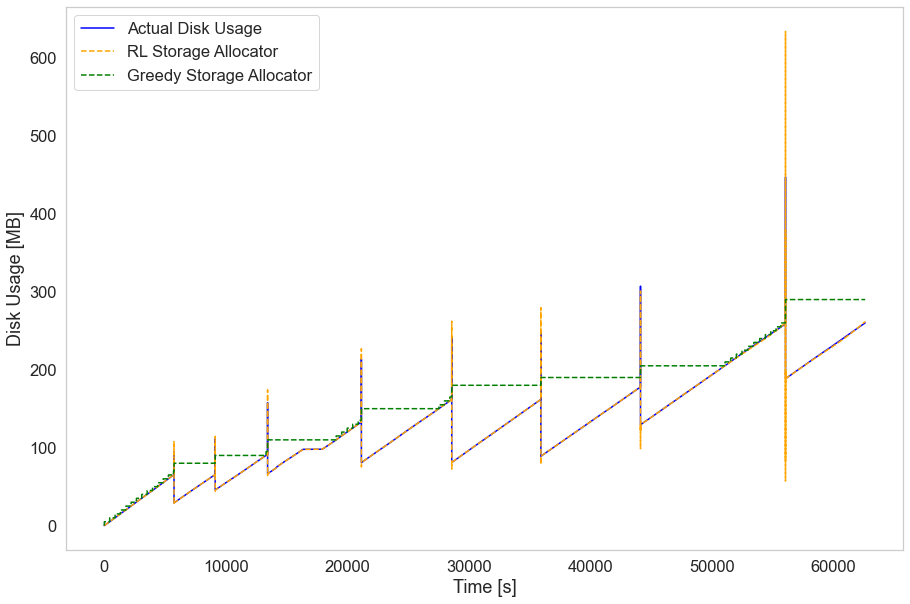

In [57]:
import seaborn as sns
usecol = ["actual_disk_usage", "timeslot", "rl_storage_allocation", "greedy_storage_allocator"]
predicted_usage_data = pandas.read_csv('redis_storage_allocation.csv', usecols=usecol, engine='python')
predicted_usage_data = predicted_usage_data.set_index("timeslot")
#dataset.head(7)
plt.figure(figsize=(15,10))
sns.set(font_scale = 1.5)
sns.set_style("whitegrid", {'axes.grid' : False})
plt.xlabel('Time [s]')
plt.ylabel('Disk Usage [MB]')
plt.plot(predicted_usage_data['actual_disk_usage'], color='blue')
plt.plot(predicted_usage_data['rl_storage_allocation'], linestyle='--', color='orange')
plt.plot(predicted_usage_data['greedy_storage_allocator'], linestyle='--', color='green')
plt.legend(['Actual Disk Usage', 'RL Storage Allocator', 'Greedy Storage Allocator'], loc='upper left')
#plt.plot(predicted_usage_data)
plt.savefig(r"C:\Users\anush\reinfl\reinfl_environment\storage_allocator\redis\redis_storage_allocation_emph.png", dpi = 300)
plt.savefig(r"C:\Users\anush\reinfl\reinfl_environment\storage_allocator\redis\redis_storage_allocation_emph.pdf", dpi = 300)

plt.show()

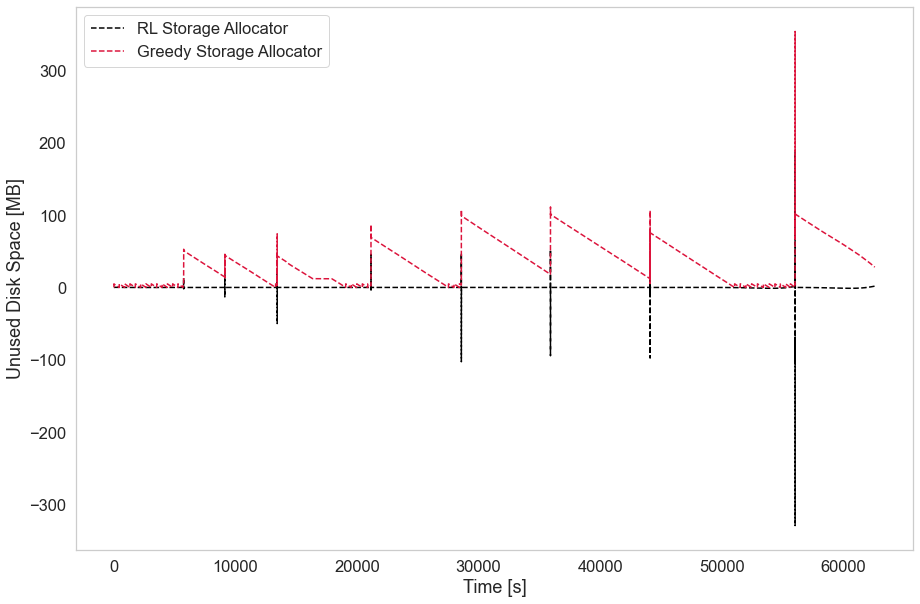

In [58]:
usecol = ["timeslot", "rl_unused_storage", "greedy_unused_storage"]
predicted_usage_data = pandas.read_csv('redis_storage_allocation.csv', usecols=usecol, engine='python')
predicted_usage_data = predicted_usage_data.set_index("timeslot")
#dataset.head(7)
plt.figure(figsize=(15,10))
sns.set(font_scale = 1.5)
sns.set_style("whitegrid", {'axes.grid' : False})
plt.xlabel('Time [s]')
plt.ylabel('Unused Disk Space [MB]')
plt.plot(predicted_usage_data['rl_unused_storage'], linestyle='--', color='black')
plt.plot(predicted_usage_data['greedy_unused_storage'], linestyle='--', color='crimson')
plt.legend(['RL Storage Allocator', 'Greedy Storage Allocator'], loc='upper left')
#plt.plot(predicted_usage_data)
plt.savefig(r"C:\Users\anush\reinfl\reinfl_environment\storage_allocator\redis\redis_unused_storage.png", dpi = 300)
plt.savefig(r"C:\Users\anush\reinfl\reinfl_environment\storage_allocator\redis\redis_unused_storage.pdf", dpi = 300)
plt.show()

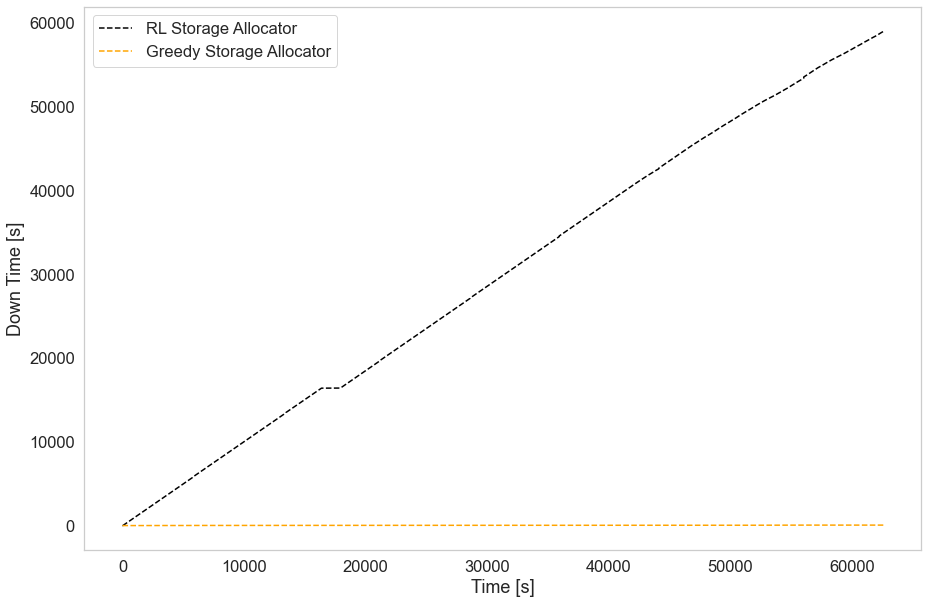

In [59]:
usecol = ["timeslot", "rl_downtime", "greedy_downtime"]
predicted_usage_data = pandas.read_csv('redis_storage_allocation.csv', usecols=usecol, engine='python')
predicted_usage_data = predicted_usage_data.set_index("timeslot")
#dataset.head(7)
plt.figure(figsize=(15,10))
sns.set(font_scale = 1.5)
sns.set_style("whitegrid", {'axes.grid' : False})
plt.xlabel('Time [s]')
plt.ylabel('Down Time [s]')
plt.plot(predicted_usage_data['rl_downtime'], linestyle='--', color='black')
plt.plot(predicted_usage_data['greedy_downtime'], linestyle='--', color='orange')
plt.legend(['RL Storage Allocator', 'Greedy Storage Allocator'], loc='upper left')
#plt.plot(predicted_usage_data)
plt.savefig(r"C:\Users\anush\reinfl\reinfl_environment\storage_allocator\redis\redis_downtime.png", dpi = 300)
plt.savefig(r"C:\Users\anush\reinfl\reinfl_environment\storage_allocator\redis\redis_downtime.pdf", dpi = 300)
plt.show()

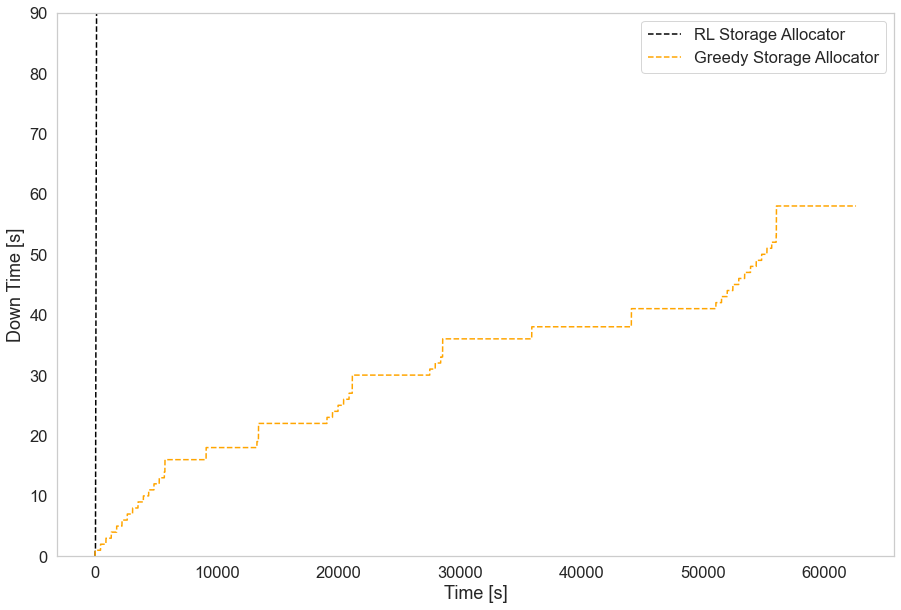

In [60]:
usecol = ["timeslot", "rl_downtime", "greedy_downtime"]
predicted_usage_data = pandas.read_csv('redis_storage_allocation.csv', usecols=usecol, engine='python')
predicted_usage_data = predicted_usage_data.set_index("timeslot")
#dataset.head(7)
plt.figure(figsize=(15,10))
sns.set(font_scale = 1.5)
sns.set_style("whitegrid", {'axes.grid' : False})
plt.xlabel('Time [s]')
plt.ylabel('Down Time [s]')
plt.plot(predicted_usage_data['rl_downtime'], linestyle='--', color='black')
plt.plot(predicted_usage_data['greedy_downtime'], linestyle='--', color='orange')
plt.legend(['RL Storage Allocator', 'Greedy Storage Allocator'], loc='upper right')
#plt.plot(predicted_usage_data)
plt.ylim(0,90)
plt.savefig(r"C:\Users\anush\reinfl\reinfl_environment\storage_allocator\redis\redis_downtime_emph.png", dpi = 300)
plt.savefig(r"C:\Users\anush\reinfl\reinfl_environment\storage_allocator\redis\redis_downtime_emph.pdf", dpi = 300)
plt.show()